In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
import datetime as datetime
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


# Load the CSV with latin1 encoding
vs_group = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/E-Commerce Project/Sample-Superstore.csv', encoding='latin1')

# Display the first few rows to confirm it loads correctly
print(vs_group.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [788]:
vs_group.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [789]:
vs_group.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [790]:
vs_group.reset_index(drop=True)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [791]:
vs_group.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [792]:
vs_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [793]:
vs_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [794]:
vs_group.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [795]:
#Checking for duplicates
vs_group.duplicated().sum()

np.int64(0)

In [796]:
#Check for objects or strings in the data if there are any
object_col = vs_group.select_dtypes(include="object").columns
vs_group[object_col].head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [797]:
#Check for objects or strings in the data if there are any
string_col = vs_group.select_dtypes(include="string").columns
vs_group[string_col].head()

""
0
1
2
3
4


In [798]:
# Check the shape of the data set
print(vs_group.shape)

(9994, 21)


In [799]:
vs_group.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [800]:
# Convert 'Order Date' to datetime in one step
vs_group['Order Date'] = pd.to_datetime(vs_group['Order Date'])

# Add 'Order_Year' and 'Order_Month' columns directly
vs_group['Order_Year'] = vs_group['Order Date'].dt.year
vs_group['Order_Month'] = vs_group['Order Date'].dt.month
vs_group['Order_Day'] = vs_group['Order Date'].dt.day

# Check the results
print(vs_group[['Order ID', 'Order Date', 'Order_Year', 'Order_Month', 'Order_Day']].head())


         Order ID Order Date  Order_Year  Order_Month  Order_Day
0  CA-2016-152156 2016-11-08        2016           11          8
1  CA-2016-152156 2016-11-08        2016           11          8
2  CA-2016-138688 2016-06-12        2016            6         12
3  US-2015-108966 2015-10-11        2015           10         11
4  US-2015-108966 2015-10-11        2015           10         11


In [801]:
# Add 'Is_Weekend' column
vs_group['Is_Weekend'] = vs_group['Order Date'].dt.dayofweek.apply(lambda x: 'Yes' if x >= 5 else 'No')

# Check the results
print(vs_group[['Order ID', 'Order Date', 'Is_Weekend']].head())

         Order ID Order Date Is_Weekend
0  CA-2016-152156 2016-11-08         No
1  CA-2016-152156 2016-11-08         No
2  CA-2016-138688 2016-06-12        Yes
3  US-2015-108966 2015-10-11        Yes
4  US-2015-108966 2015-10-11        Yes


In [802]:
#Calculate the initial price of every item

# Ensure columns are numeric
vs_group['Sales'] = pd.to_numeric(vs_group['Sales'], errors='coerce')
vs_group['Quantity'] = pd.to_numeric(vs_group['Quantity'], errors='coerce')
vs_group['Discount'] = pd.to_numeric(vs_group['Discount'], errors='coerce')

# Calculate Original Price per Unit
vs_group['Original_Price'] = vs_group['Sales'] / (vs_group['Quantity'] * (1 - vs_group['Discount']))

# Check the results
print(vs_group[['Sales', 'Quantity', 'Discount', 'Original_Price']].head())


      Sales  Quantity  Discount  Original_Price
0  261.9600         2      0.00          130.98
1  731.9400         3      0.00          243.98
2   14.6200         2      0.00            7.31
3  957.5775         5      0.45          348.21
4   22.3680         2      0.20           13.98


In [803]:
vs_group.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Is_Weekend,Original_Price
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,No,130.98
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,No,243.98
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Yes,7.31
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Yes,348.21
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Yes,13.98
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6,9,No,6.98
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Newell 322,7.2800,4,0.00,1.9656,2014,6,9,No,1.82
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2014,6,9,No,188.99
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2014,6,9,No,7.71
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2014,6,9,No,22.98


In [804]:
#Take out days name from date column

# Extract the day name and create a new column
vs_group['Day Name'] = vs_group['Order Date'].dt.day_name()

# Display the first few rows with the new column
print(vs_group[['Order Date', 'Day Name']].head())

  Order Date Day Name
0 2016-11-08  Tuesday
1 2016-11-08  Tuesday
2 2016-06-12   Sunday
3 2015-10-11   Sunday
4 2015-10-11   Sunday


In [805]:
vs_group.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Is_Weekend,Original_Price,Day Name
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,11,8,No,130.98,Tuesday
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,11,8,No,243.98,Tuesday
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,6,12,Yes,7.31,Sunday
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,10,11,Yes,348.21,Sunday
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,10,11,Yes,13.98,Sunday


In [806]:
#take out Seasons from the date column

# Ensure Date column is in datetime format
vs_group['Order Date'] = pd.to_datetime(vs_group['Order Date'])

# Function to convert month to season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply function to Date column to create a new 'Season' column
vs_group['Season'] = vs_group['Order Date'].apply(get_season)


In [807]:
#classify the type of customer by assigning 0= 1 time purchase and 1 = more than 1 time purchase

# Group by 'Customer ID' and count the number of purchases per customer
customer_purchase_count = vs_group.groupby('Customer ID')['Order ID'].nunique()

# Map purchase count to a 'customer type' column
vs_group['customer type'] = vs_group['Customer ID'].map(lambda x: 1 if customer_purchase_count[x] > 1 else 0)

# Verify the results
print(vs_group[['Customer ID', 'customer type']].drop_duplicates())


     Customer ID  customer type
0       CG-12520              1
2       DV-13045              1
3       SO-20335              1
5       BH-11710              1
12      AA-10480              1
...          ...            ...
8666    CJ-11875              0
9209    RS-19870              1
9399    SC-20845              1
9441    RE-19405              0
9558    SM-20905              0

[793 rows x 2 columns]


In [808]:
# Count the number of unique values in the 'Segment' column
unique_segments = vs_group['Segment'].nunique()

# Display the unique values and the count
unique_values = vs_group['Segment'].unique()

print(f"Number of unique values in 'Segment': {unique_segments}")
print(f"Unique values in 'Segment': {unique_values}")


Number of unique values in 'Segment': 3
Unique values in 'Segment': ['Consumer' 'Corporate' 'Home Office']


In [809]:
# Mapping dictionary for 'Segment'
segment_mapping = {'Consumer': 0, 'Corporate': 1, 'Home Office': 2}

# Create a new column 'Segment type' based on the mapping
vs_group['Segment type'] = vs_group['Segment'].map(segment_mapping)

# Display the first few rows to verify
print(vs_group[['Segment', 'Segment type']].head())


     Segment  Segment type
0   Consumer             0
1   Consumer             0
2  Corporate             1
3   Consumer             0
4   Consumer             0


In [810]:
vs_group.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,Order_Year,Order_Month,Order_Day,Is_Weekend,Original_Price,Day Name,Season,customer type,Segment type
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,2016,11,8,No,130.98,Tuesday,Autumn,1,0
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.5820,2016,11,8,No,243.98,Tuesday,Autumn,1,0
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.8714,2016,6,12,Yes,7.31,Sunday,Summer,1,1
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.0310,2015,10,11,Yes,348.21,Sunday,Autumn,1,0
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.5164,2015,10,11,Yes,13.98,Sunday,Autumn,1,0


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3704114148.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Quantity', data=total_quantity_df, palette='Blues_d')


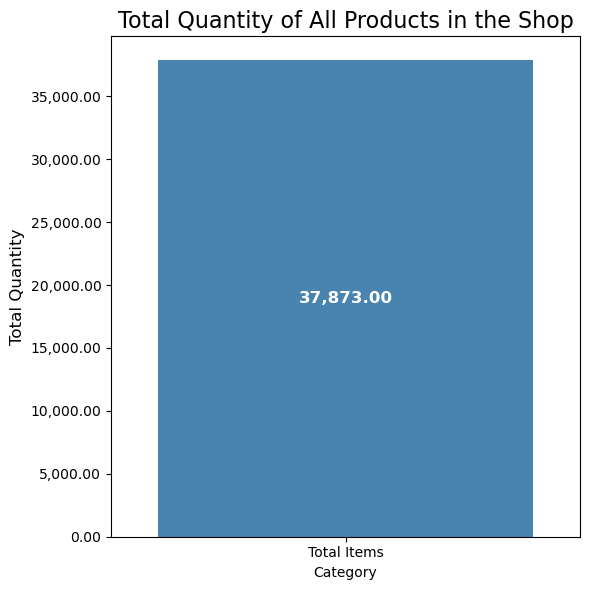

In [811]:

# Calculate the total quantity of all products
total_quantity = vs_group['Quantity'].sum()

# Create a DataFrame for plotting
total_quantity_df = pd.DataFrame({'Category': ['Total Items'], 'Quantity': [total_quantity]})

# Set a figure size for the plot
plt.figure(figsize=(6, 6))

# Create a bar plot to visualize the total quantity of all items in the shop
sns.barplot(x='Category', y='Quantity', data=total_quantity_df, palette='Blues_d')

# Add titles and labels
plt.title('Total Quantity of All Products in the Shop', fontsize=16)
plt.ylabel('Total Quantity', fontsize=12)

# Format the y-axis labels with commas for thousands and round the value to two decimal places
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Annotate the bar with the total quantity value in the middle of the bar
for index, row in total_quantity_df.iterrows():
    plt.text(index, row['Quantity'] / 2,  # Middle of the bar (half the height)
             f'{row["Quantity"]:,.2f}',  # Display value with commas and two decimal places
             ha='center', va='center', fontsize=12, color='white', weight='bold')  # Center alignment, bold, and white color for visibility

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


Total Sales (All Years Combined): $2,297,200.86


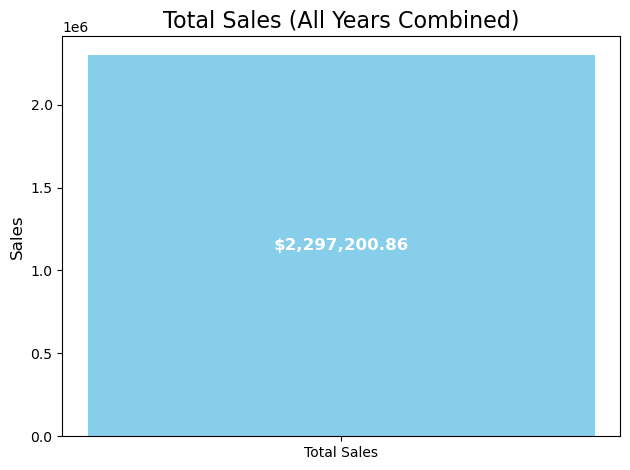

In [812]:
total_sales = vs_group['Sales'].sum()
print(f"Total Sales (All Years Combined): ${total_sales:,.2f}")

# Data for visualization
categories = ['Total Sales']
values = [total_sales]

# Plot
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('Total Sales (All Years Combined)', fontsize=16)
plt.ylabel('Sales', fontsize=12)

# Annotate the bar with the total sales value in the middle
for i, value in enumerate(values):
    plt.text(i, value / 2,  # Middle of the bar (half the height)
             f'${value:,.2f}',  # Add dollar sign and format with commas
             ha='center', va='center', fontsize=12, color='white', weight='bold')  # Centered text with white color

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Total Profit (All Years Combined): $286,397.02


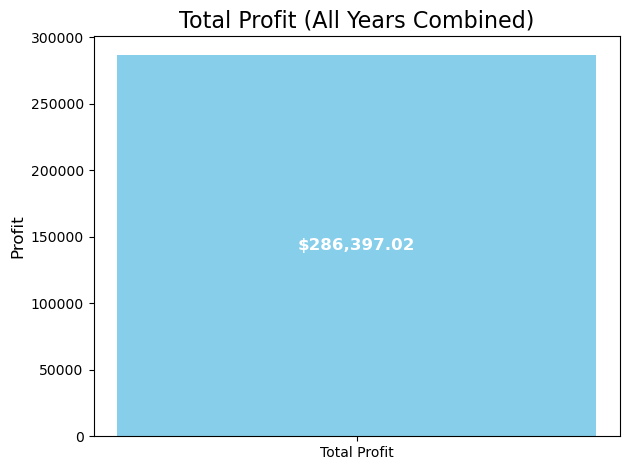

In [813]:
total_profit = vs_group['Profit'].sum()
print(f"Total Profit (All Years Combined): ${total_profit:,.2f}")

# Data for visualization
categories = ['Total Profit']
values = [total_profit]

# Plot
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('Total Profit (All Years Combined)', fontsize=16)
plt.ylabel('Profit', fontsize=12)

# Annotate the bar with the total profit value in the middle
for i, value in enumerate(values):
    plt.text(i, value / 2,  # Middle of the bar (half the height)
             f'${value:,.2f}',  # Add dollar sign and format with commas
             ha='center', va='center', fontsize=12, color='white', weight='bold')  # Centered text with white color

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


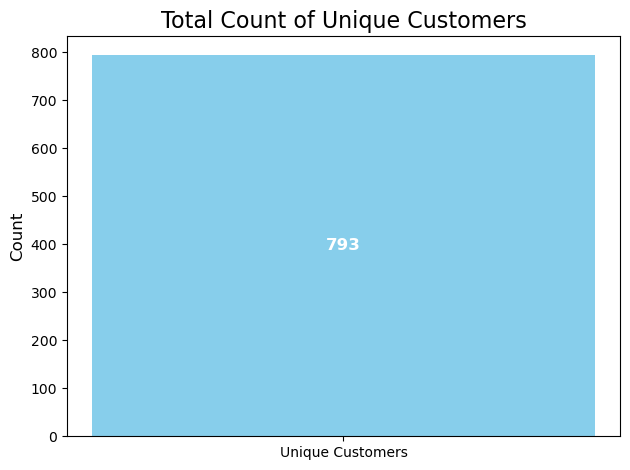

In [814]:
# Calculate the total count of unique Customer IDs
unique_customers_count = vs_group['Customer ID'].nunique()

# Prepare data for visualization
categories = ['Unique Customers']
values = [unique_customers_count]

# Plot
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('Total Count of Unique Customers', fontsize=16)
plt.ylabel('Count', fontsize=12)

# Annotate the bar with the total count value
for i, value in enumerate(values):
    plt.text(i, value / 2,  # Middle of the bar (half the height)
             f'{value}',  # Display the count as a whole number
             ha='center', va='center', fontsize=12, color='white', weight='bold')  # Centered text with white color

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/384756824.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Sub-Category', data=sub_category_quantity, palette='Blues_d')


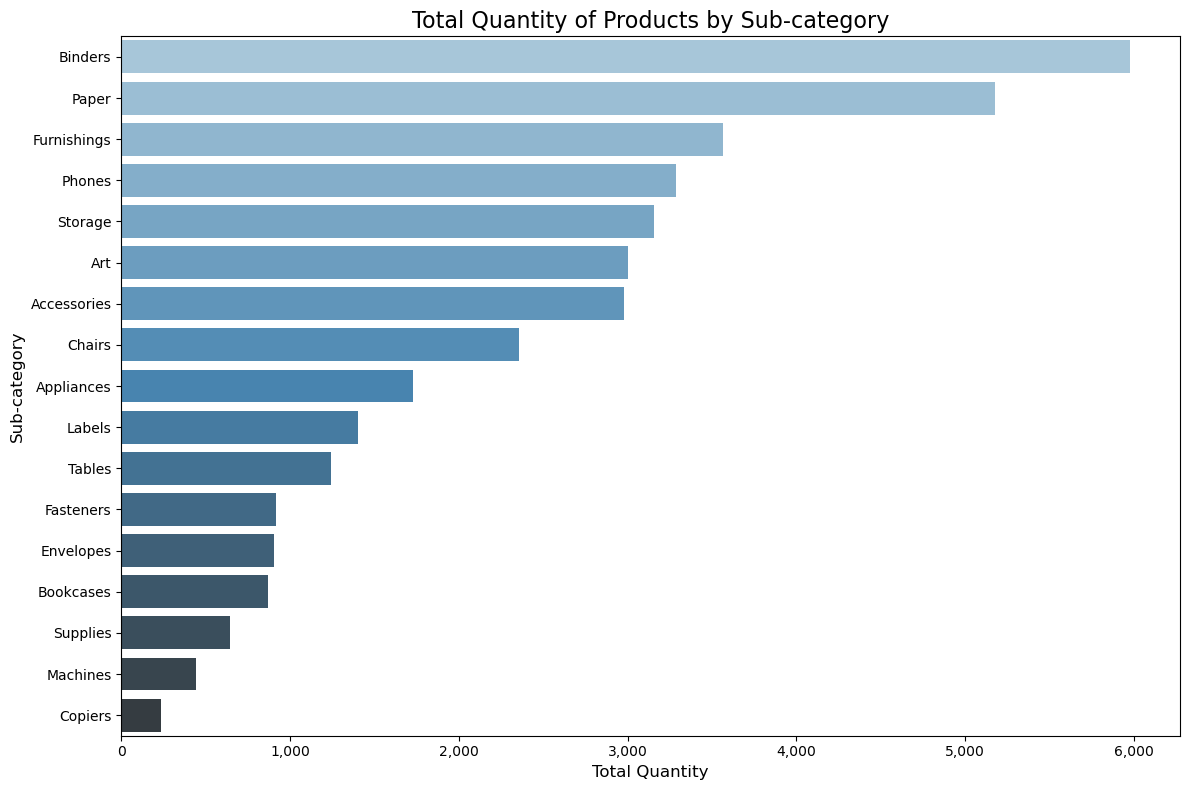

In [815]:
# Group by 'Sub-Category' to calculate the total quantity for each sub-category
sub_category_quantity = vs_group.groupby('Sub-Category')['Quantity'].sum().reset_index()

# Sort the data by quantity for better visualization (optional)
sub_category_quantity = sub_category_quantity.sort_values(by='Quantity', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the total quantity of products by sub-category
sns.barplot(x='Quantity', y='Sub-Category', data=sub_category_quantity, palette='Blues_d')

# Add titles and labels
plt.title('Total Quantity of Products by Sub-category', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Sub-category', fontsize=12)

# Format the x-axis labels with commas for thousands and round to two decimal places
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3341838537.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Sub-Category', data=sub_category_profit, palette='Greens_d')


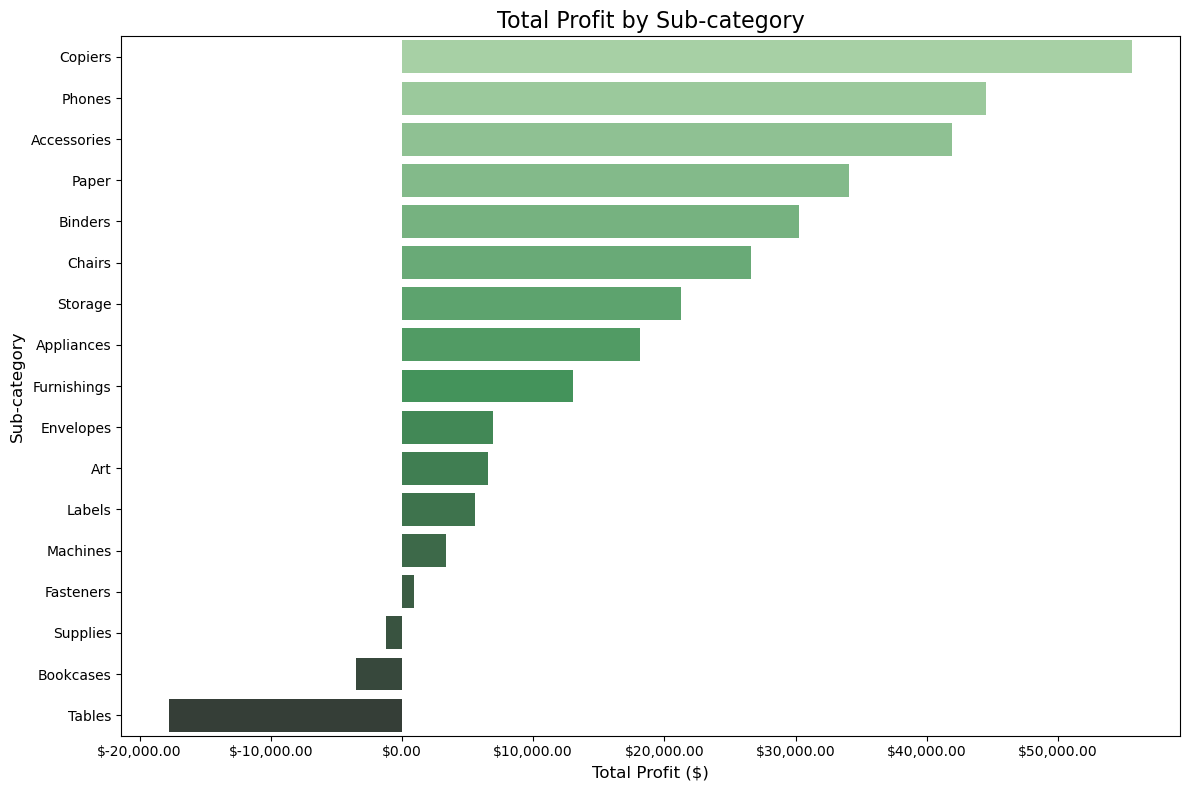

In [816]:
# Group by 'Sub-Category' to calculate the total profit for each sub-category
sub_category_profit = vs_group.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort the data by profit for better visualization (optional)
sub_category_profit = sub_category_profit.sort_values(by='Profit', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the total profit by sub-category
sns.barplot(x='Profit', y='Sub-Category', data=sub_category_profit, palette='Greens_d')

# Add titles and labels
plt.title('Total Profit by Sub-category', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Sub-category', fontsize=12)

# Format the x-axis labels with dollar sign and commas for thousands
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3089335347.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sub-Category', data=sub_category_sales, palette='Blues_d')


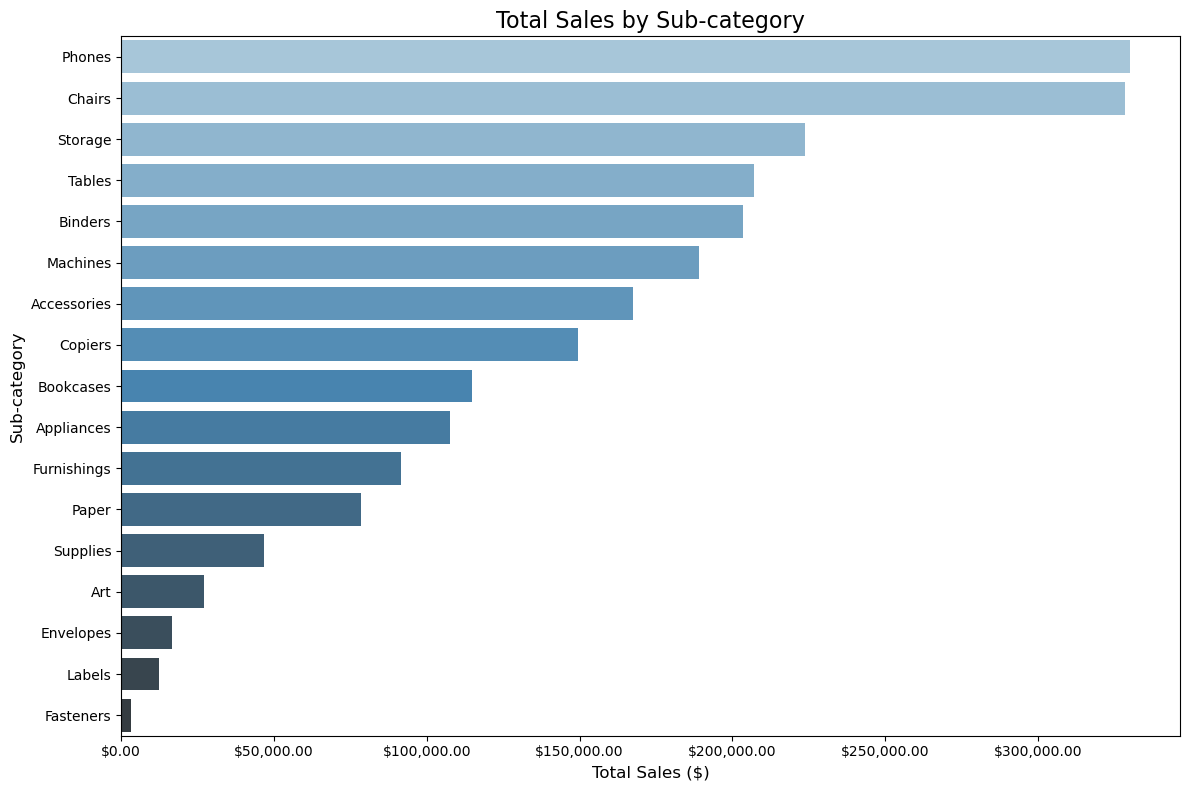

In [817]:
# Group by 'Sub-Category' to calculate the total sales for each sub-category
sub_category_sales = vs_group.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort the data by sales for better visualization (optional)
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the total sales by sub-category
sns.barplot(x='Sales', y='Sub-Category', data=sub_category_sales, palette='Blues_d')

# Add titles and labels
plt.title('Total Sales by Sub-category', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Sub-category', fontsize=12)

# Format the x-axis labels with a dollar sign and commas for thousands
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1713167942.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_purchases, x='Year', y='Total Purchases', palette='viridis')


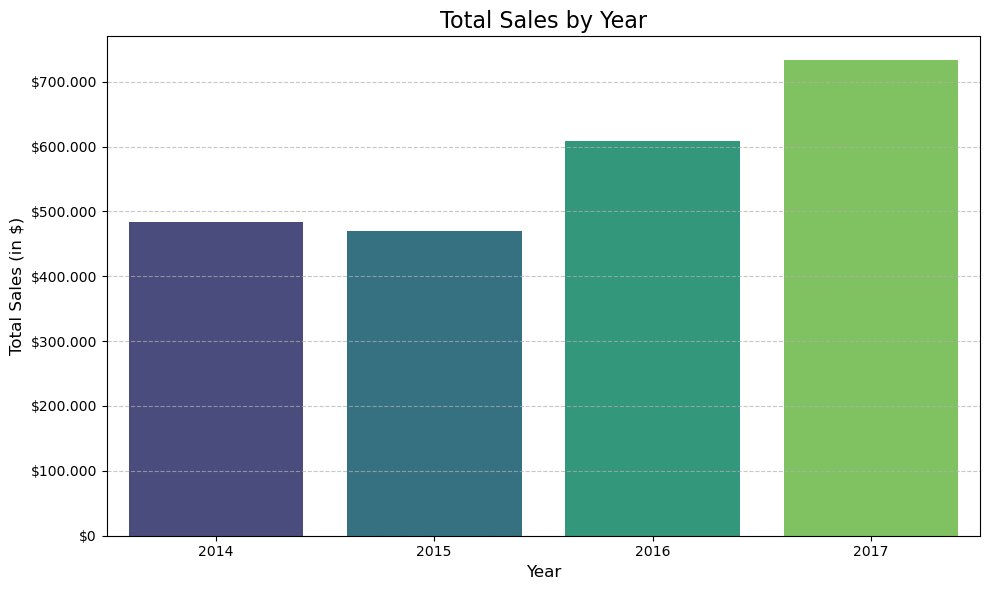

In [818]:
# Aggregate data: total purchases per year
yearly_purchases = vs_group.groupby('Order_Year')['Sales'].sum().reset_index()

# Rename columns for clarity
yearly_purchases.columns = ['Year', 'Total Purchases']

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_purchases, x='Year', y='Total Purchases', palette='viridis')

# Customize the plot
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (in $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1727570154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_purchases, x='Year', y='Total Profits', palette='viridis')


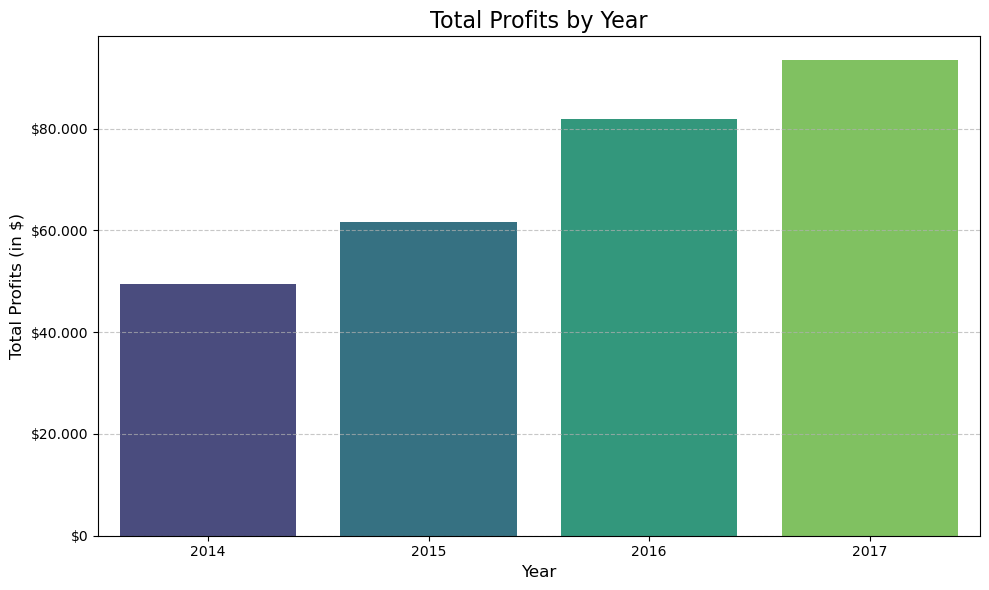

In [819]:
# Aggregate data: total profits per year
yearly_purchases = vs_group.groupby('Order_Year')['Profit'].sum().reset_index()

# Rename columns for clarity
yearly_purchases.columns = ['Year', 'Total Profits']

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_purchases, x='Year', y='Total Profits', palette='viridis')

# Customize the plot
plt.title('Total Profits by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Profits (in $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


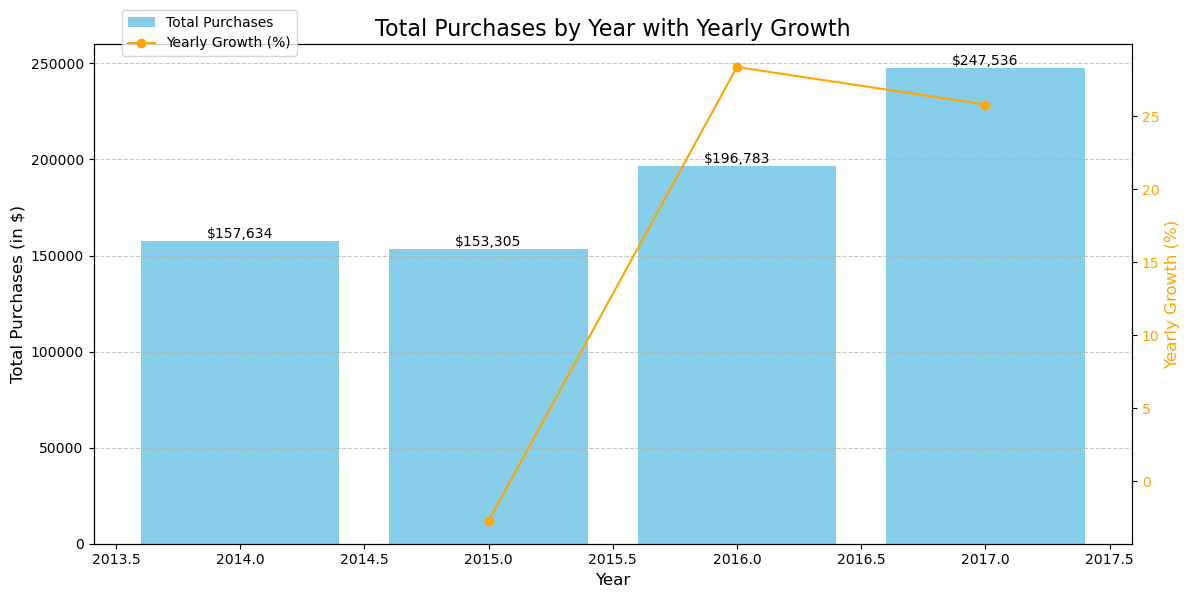

In [820]:
# Calculate total purchases per year
yearly_purchases = vs_group.groupby('Order_Year')['Original_Price'].sum().reset_index()

# Rename columns for clarity
yearly_purchases.columns = ['Year', 'Total Purchases']

# Calculate yearly growth percentage
yearly_purchases['Yearly Growth (%)'] = yearly_purchases['Total Purchases'].pct_change() * 100

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for total purchases
bars = ax.bar(
    yearly_purchases['Year'], 
    yearly_purchases['Total Purchases'], 
    color='skyblue', 
    label='Total Purchases'
)

# Line plot for yearly growth percentage
ax2 = ax.twinx()
line, = ax2.plot(
    yearly_purchases['Year'], 
    yearly_purchases['Yearly Growth (%)'], 
    color='orange', 
    marker='o', 
    label='Yearly Growth (%)'
)

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'${height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Customize the primary y-axis (Total Purchases)
ax.set_title('Total Purchases by Year with Yearly Growth', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Purchases (in $)', fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the secondary y-axis (Yearly Growth)
ax2.set_ylabel('Yearly Growth (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange', labelsize=10)

# Add a combined legend
fig.legend(
    [bars, line], 
    ['Total Purchases', 'Yearly Growth (%)'], 
    loc='upper left', 
    bbox_to_anchor=(0.1, 1), 
    fontsize=10
)

# Optimize layout and show the plot
fig.tight_layout()
plt.show()


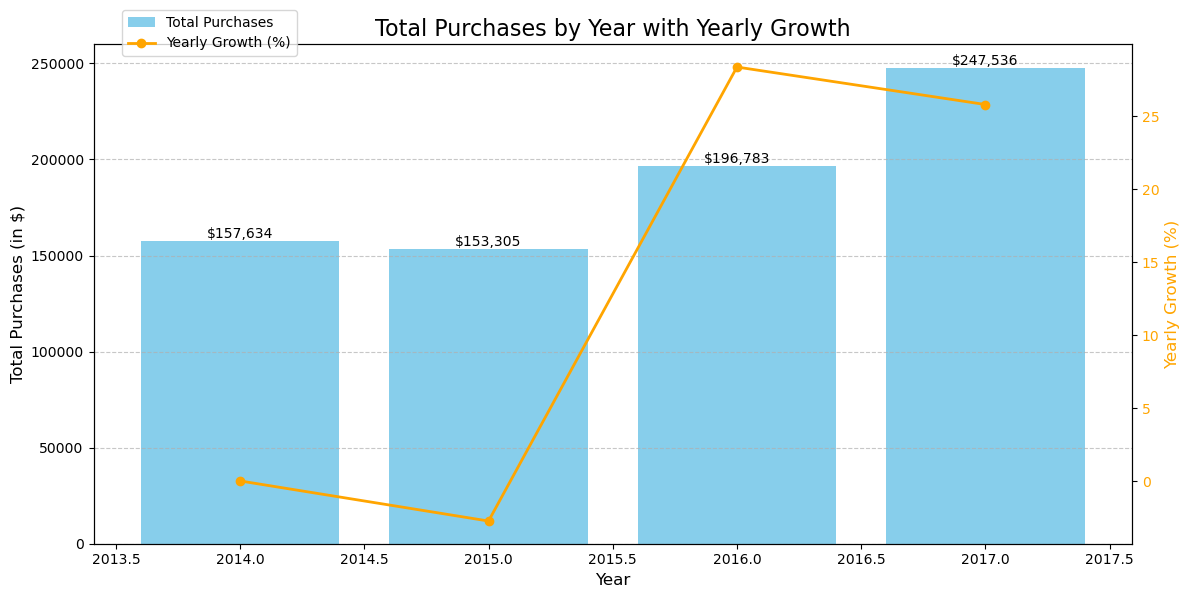

In [821]:
# Calculate total purchases per year
yearly_purchases = vs_group.groupby('Order_Year')['Original_Price'].sum().reset_index()

# Rename columns for clarity
yearly_purchases.columns = ['Year', 'Total Purchases']

# Calculate yearly growth percentage, handle NaN for the first year
yearly_purchases['Yearly Growth (%)'] = yearly_purchases['Total Purchases'].pct_change() * 100
yearly_purchases['Yearly Growth (%)'] = yearly_purchases['Yearly Growth (%)'].fillna(0)  # Replace NaN with 0 for first year

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for total purchases
bars = ax.bar(
    yearly_purchases['Year'], 
    yearly_purchases['Total Purchases'], 
    color='skyblue', 
    label='Total Purchases'
)

# Line plot for yearly growth percentage
ax2 = ax.twinx()
line, = ax2.plot(
    yearly_purchases['Year'], 
    yearly_purchases['Yearly Growth (%)'], 
    color='orange', 
    marker='o', 
    label='Yearly Growth (%)',
    linestyle='-',  # Ensure line crosses all years
    linewidth=2  # Make the line thicker for better visibility
)

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'${height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Customize the primary y-axis (Total Purchases)
ax.set_title('Total Purchases by Year with Yearly Growth', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Purchases (in $)', fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the secondary y-axis (Yearly Growth)
ax2.set_ylabel('Yearly Growth (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange', labelsize=10)

# Add a combined legend
fig.legend(
    [bars, line], 
    ['Total Purchases', 'Yearly Growth (%)'], 
    loc='upper left', 
    bbox_to_anchor=(0.1, 1), 
    fontsize=10
)

# Optimize layout and show the plot
fig.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3803406444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Month', y='Sales', data=monthly_sales, palette='viridis')


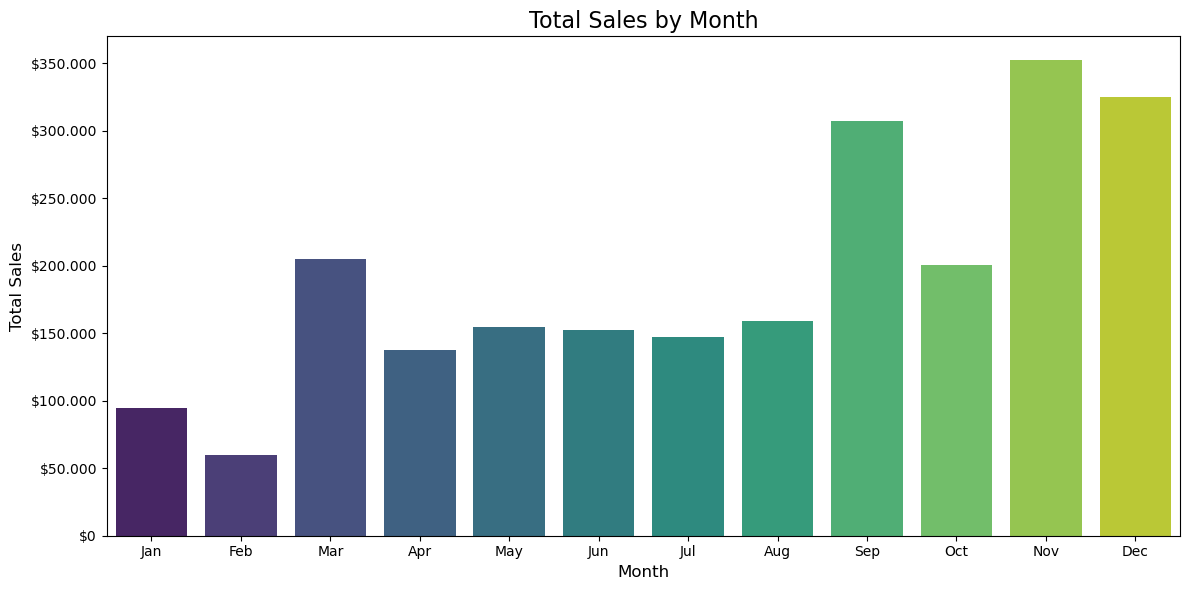

In [822]:
# Group by 'Order_Month' to calculate total sales
monthly_sales = vs_group.groupby('Order_Month')['Sales'].sum().reset_index()

# Sort months in chronological order
monthly_sales = monthly_sales.sort_values(by='Order_Month')

# Define a function to format the x-axis labels
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Visualize the sales by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Month', y='Sales', data=monthly_sales, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3526159971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Month', y='Profit', data=monthly_profit, palette='viridis')


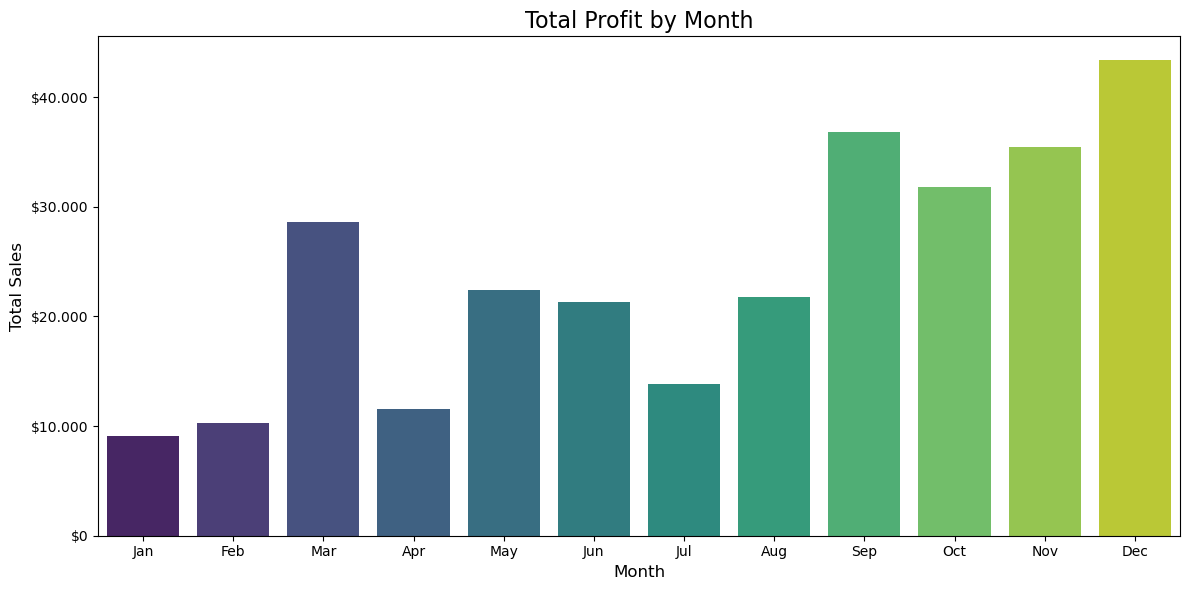

In [823]:
# Group by 'Order_Month' to calculate total sales
monthly_profit = vs_group.groupby('Order_Month')['Profit'].sum().reset_index()

# Sort months in chronological order
monthly_profit = monthly_profit.sort_values(by='Order_Month')

# Define a function to format the x-axis labels
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Visualize the sales by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Month', y='Profit', data=monthly_profit, palette='viridis')

# Add titles and labels
plt.title('Total Profit by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Show the plot
plt.tight_layout()
plt.show()


Top 5 Customers by Sales and Segment:
     Customer Name      Segment      Sales
686    Sean Miller  Home Office  25043.050
730   Tamara Chand    Corporate  19052.218
622   Raymond Buch     Consumer  15117.339
757   Tom Ashbrook  Home Office  14595.620
6    Adrian Barton     Consumer  14473.571


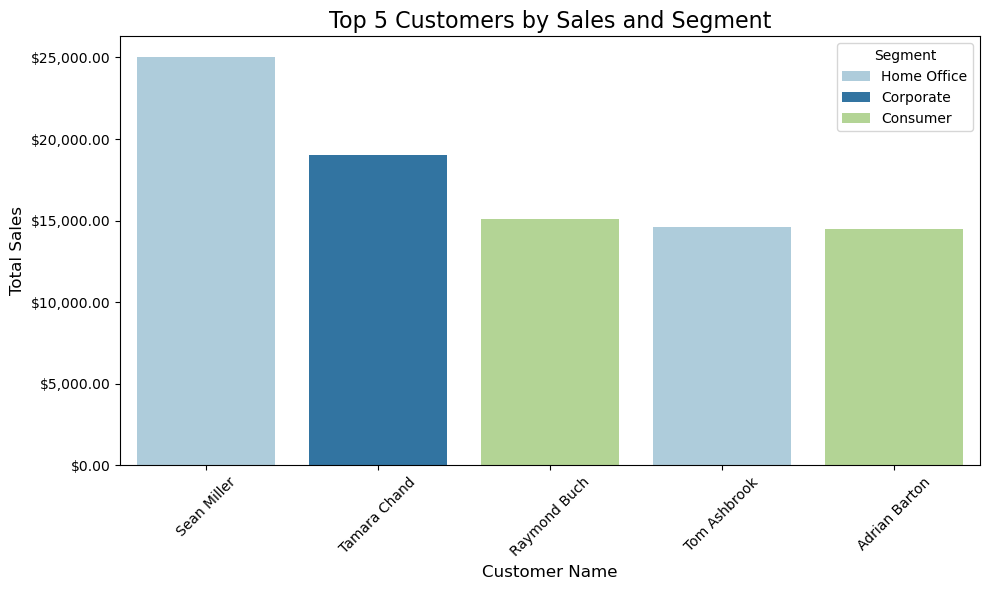

In [824]:
# Group by 'Customer Name' and 'Segment' to calculate total sales for each customer
customer_segment_sales = vs_group.groupby(['Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort the customers by total sales in descending order and get the top 5 customers
top_5_customers = customer_segment_sales.sort_values(by='Sales', ascending=False).head(5)

# Display top 5 customers by sales
print("Top 5 Customers by Sales and Segment:")
print(top_5_customers)

# Visualize the top 5 customers by sales, showing their segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Name', y='Sales', data=top_5_customers, hue='Segment', palette='Paired')  # Changed palette to 'Paired'

# Add titles and labels
plt.title('Top 5 Customers by Sales and Segment', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Format the y-axis labels to show dollar sign
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


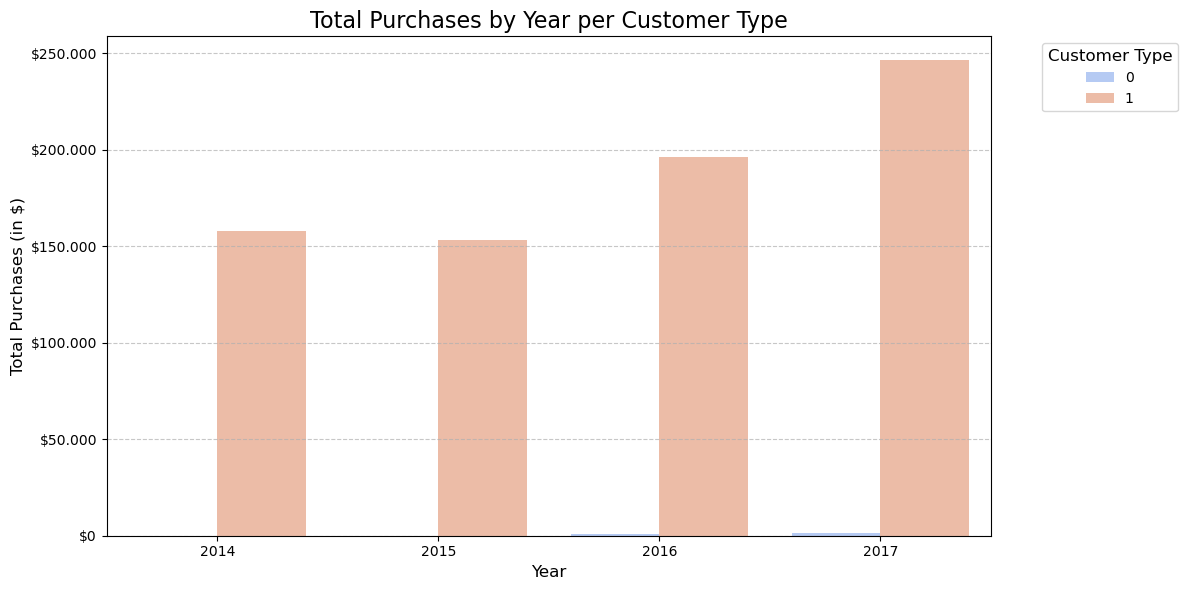

In [825]:
# Aggregate data: total purchases by year and customer type
year_customer_purchases = (
    vs_group.groupby(['Order_Year', 'customer type'])['Original_Price']
    .sum()
    .reset_index()
)

# Rename columns for clarity
year_customer_purchases.columns = ['Year', 'Customer Type', 'Total Purchases']

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the grouped bar chart
sns.barplot(
    data=year_customer_purchases,
    x='Year',
    y='Total Purchases',
    hue='Customer Type',
    palette='coolwarm',  # Palette ensures color matching between bars and legend
)

# Customize the plot
plt.title('Total Purchases by Year per Customer Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Purchases (in $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Customize the legend (keep it auto-matched to the bar colors)
plt.legend(
    title='Customer Type',
    fontsize=10,
    title_fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


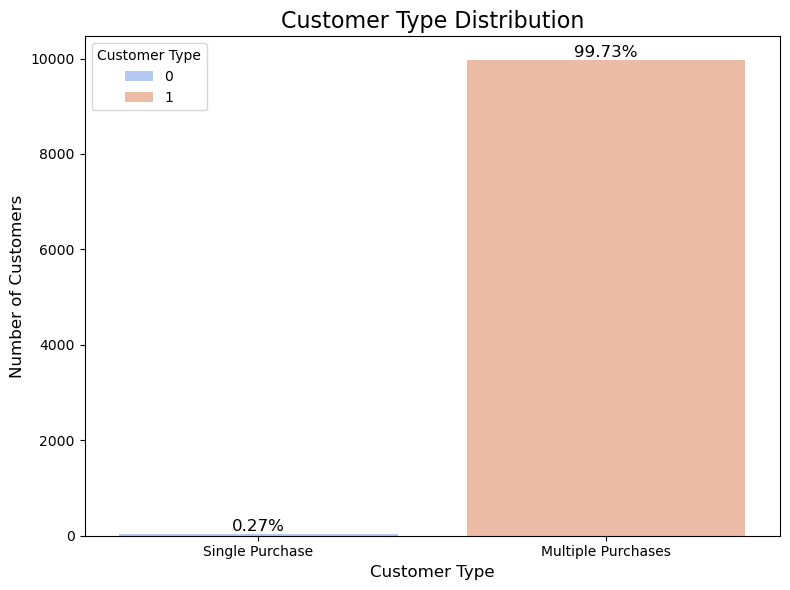

In [826]:
# Group by 'Customer ID' and count the number of unique orders per customer
customer_purchase_count = vs_group.groupby('Customer ID')['Order ID'].nunique()

# Assign 'customer type' based on the purchase count: 0 for single purchase, 1 for multiple purchases
vs_group['customer type'] = vs_group['Customer ID'].map(lambda x: 1 if customer_purchase_count[x] > 1 else 0)

# Calculate the number of customers in each category (0 = Single Purchase, 1 = Multiple Purchases)
customer_type_counts = vs_group['customer type'].value_counts().reset_index()

# Rename columns for clarity
customer_type_counts.columns = ['Customer Type', 'Count']

# Ensure 'Customer Type' column is in the correct order
customer_type_counts = customer_type_counts.set_index('Customer Type').reindex([0, 1]).reset_index()

# Add a 'Hue' column for visualization
customer_type_counts['Type Description'] = customer_type_counts['Customer Type'].map({0: 'Single Purchase', 1: 'Multiple Purchases'})

# Calculate percentages for each category
total_customers = customer_type_counts['Count'].sum()
customer_type_counts['Percentage'] = (customer_type_counts['Count'] / total_customers) * 100

# Plot the bar plot with hue
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Type', y='Count', hue='Customer Type', data=customer_type_counts, palette='coolwarm')

# Add percentages on top of the bars
for i, row in customer_type_counts.iterrows():
    plt.text(i, row['Count'] + 10, f'{row["Percentage"]:.2f}%', 
             ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Customer Type Distribution', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Single Purchase', 'Multiple Purchases'], fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1227969178.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_purchase, x='Segment', y='Original_Price', palette='viridis')


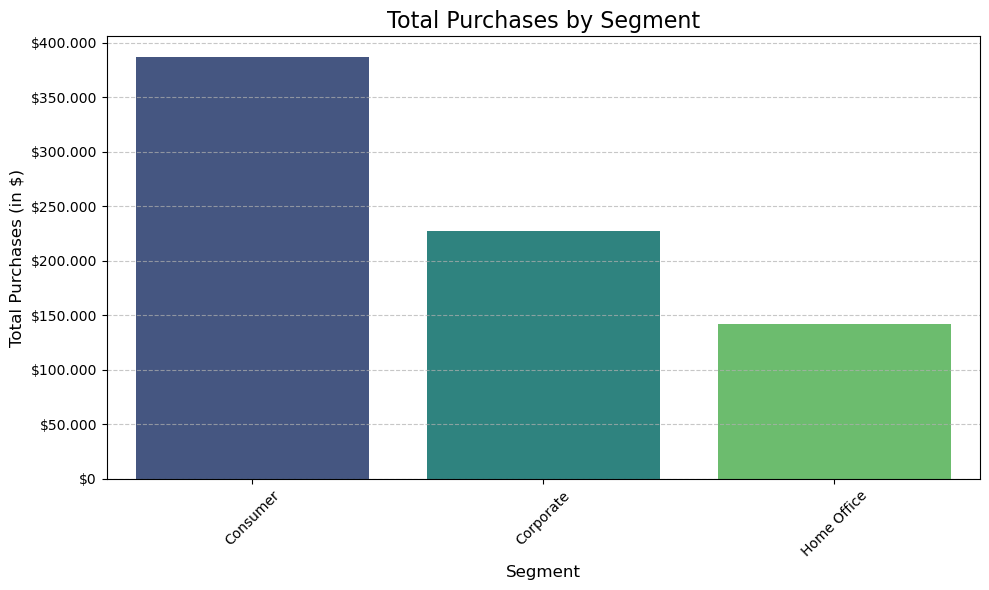

In [827]:
# Group by 'Segment' and calculate the total purchase for each segment
segment_purchase = vs_group.groupby('Segment')['Original_Price'].sum().reset_index()

# Sort the data by 'Original_Price' in descending order for better visualization
segment_purchase = segment_purchase.sort_values(by='Original_Price', ascending=False)

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_purchase, x='Segment', y='Original_Price', palette='viridis')

# Customize the plot
plt.title('Total Purchases by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Purchases (in $)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


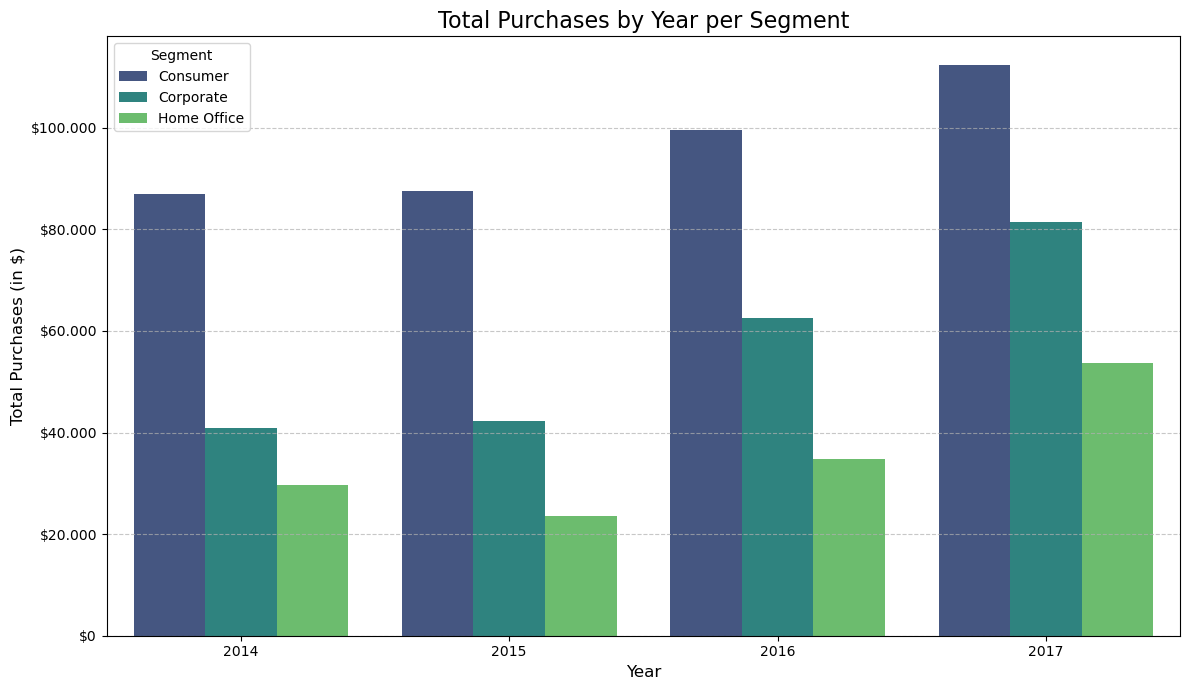

In [828]:
# Group by 'Order_Year' and 'Segment' to calculate total purchases for each segment per year
yearly_segment_purchase = vs_group.groupby(['Order_Year', 'Segment'])['Original_Price'].sum().reset_index()

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Plot the data
plt.figure(figsize=(12, 7))
sns.barplot(data=yearly_segment_purchase, x='Order_Year', y='Original_Price', hue='Segment', palette='viridis')

# Customize the plot
plt.title('Total Purchases by Year per Segment', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Purchases (in $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Customize the legend
plt.legend(title='Segment', loc='upper left', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


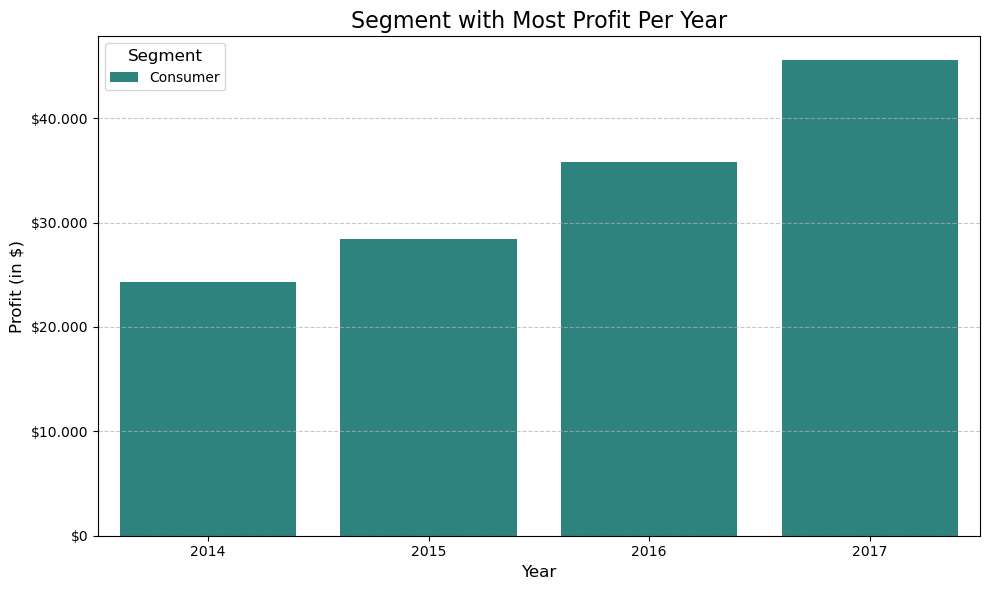

In [829]:
# Group by 'Order_Year' and 'Segment', summing up the profits
segment_profit = vs_group.groupby(['Order_Year', 'Segment'])['Profit'].sum().reset_index()

# Find the segment with the maximum profit for each year
max_profit_per_year = segment_profit.loc[segment_profit.groupby('Order_Year')['Profit'].idxmax()]

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x="Order_Year", y="Profit", hue="Segment", data=max_profit_per_year, palette="viridis")

# Customize the plot
plt.title("Segment with Most Profit Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Profit (in $)", fontsize=12)

# Apply dollar formatting to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Customize the legend
plt.legend(title="Segment", fontsize=10, title_fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


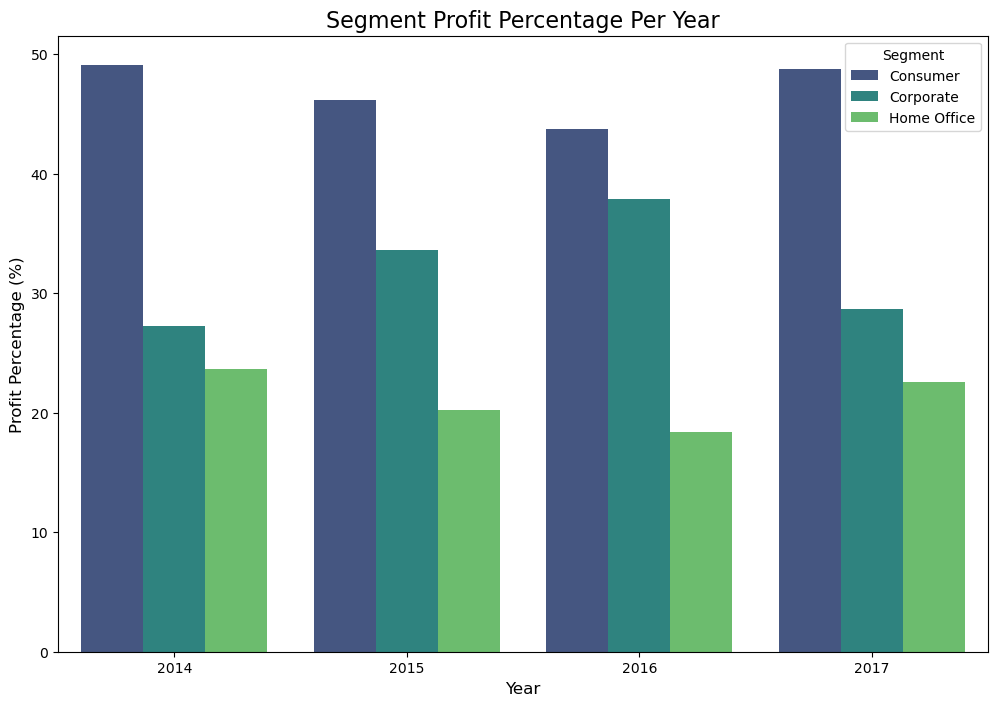

In [830]:
# Group by 'Order_Year' and 'Segment', summing up the profits
segment_profit = vs_group.groupby(['Order_Year', 'Segment'])['Profit'].sum().reset_index()

# Calculate total profit per year
total_profit_per_year = segment_profit.groupby('Order_Year')['Profit'].transform('sum')

# Calculate percentage of profit for each segment
segment_profit['Profit_Percentage'] = (segment_profit['Profit'] / total_profit_per_year) * 100

# Plot the results as a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x="Order_Year", y="Profit_Percentage", hue="Segment", data=segment_profit, palette="viridis")

# Customize the plot
plt.title("Segment Profit Percentage Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Profit Percentage (%)", fontsize=12)
plt.legend(title="Segment", loc='upper right')
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3247942157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total_Purchases', data=state_purchases, ax=axes[0], palette='Blues_d')
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3247942157.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=state_profits, ax=axes[1], palette='Greens_d')


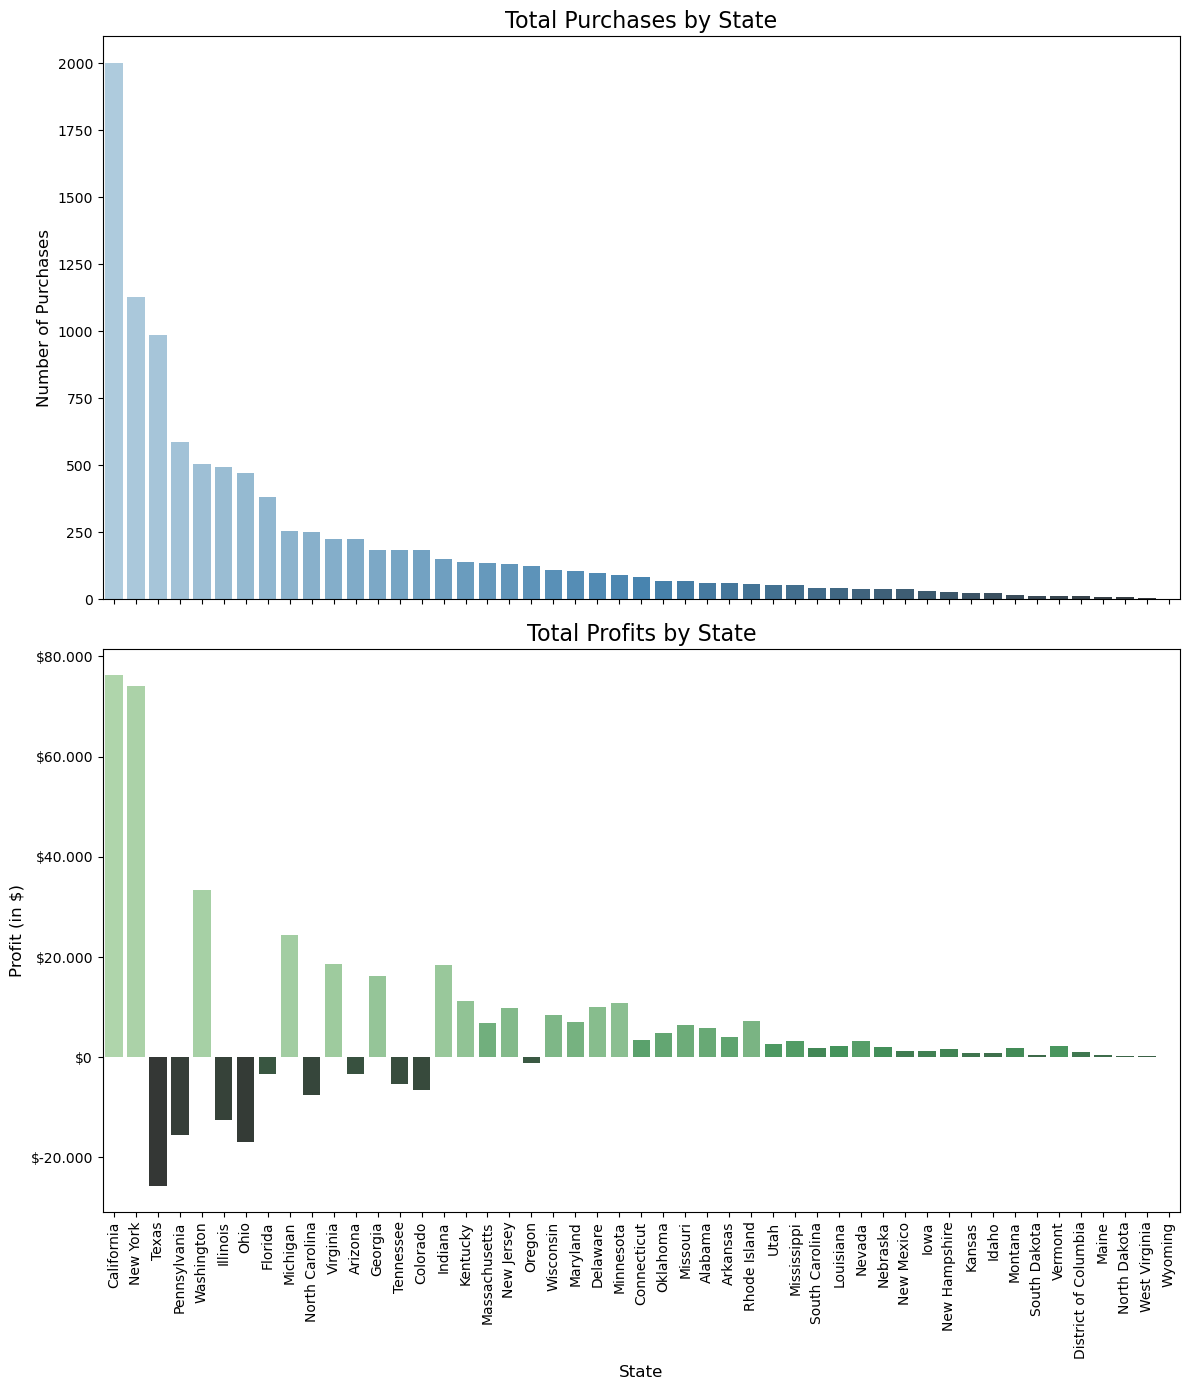

In [831]:
# Group by 'State' to calculate total purchases and total profits
state_purchases = vs_group.groupby('State')['Order ID'].count().reset_index()
state_purchases.rename(columns={'Order ID': 'Total_Purchases'}, inplace=True)

state_profits = vs_group.groupby('State')['Profit'].sum().reset_index()

# Sort data for better visualization
state_purchases = state_purchases.sort_values(by='Total_Purchases', ascending=False)
state_profits = state_profits.sort_values(by='Profit', ascending=False)

# Define a formatter function for the y-axis
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14), sharex=True)

# Plot total purchases by state
sns.barplot(x='State', y='Total_Purchases', data=state_purchases, ax=axes[0], palette='Blues_d')
axes[0].set_title('Total Purchases by State', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Purchases', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Plot total profits by state
sns.barplot(x='State', y='Profit', data=state_profits, ax=axes[1], palette='Greens_d')
axes[1].set_title('Total Profits by State', fontsize=16)
axes[1].set_xlabel('State', fontsize=12)
axes[1].set_ylabel('Profit (in $)', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Apply dollar formatting to the Profit axis
axes[1].yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Adjust layout
plt.tight_layout()
plt.show()


Top 5 States by Purchases:
           State  Total_Purchases
3     California             2001
30      New York             1128
41         Texas              985
36  Pennsylvania              587
45    Washington              506

Top 5 States by Profits:
         State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1391213525.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total_Purchases', data=top_5_purchases, ax=axes[0], palette='Blues_d')
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1391213525.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=top_5_profits, ax=axes[1], palette='Greens_d')


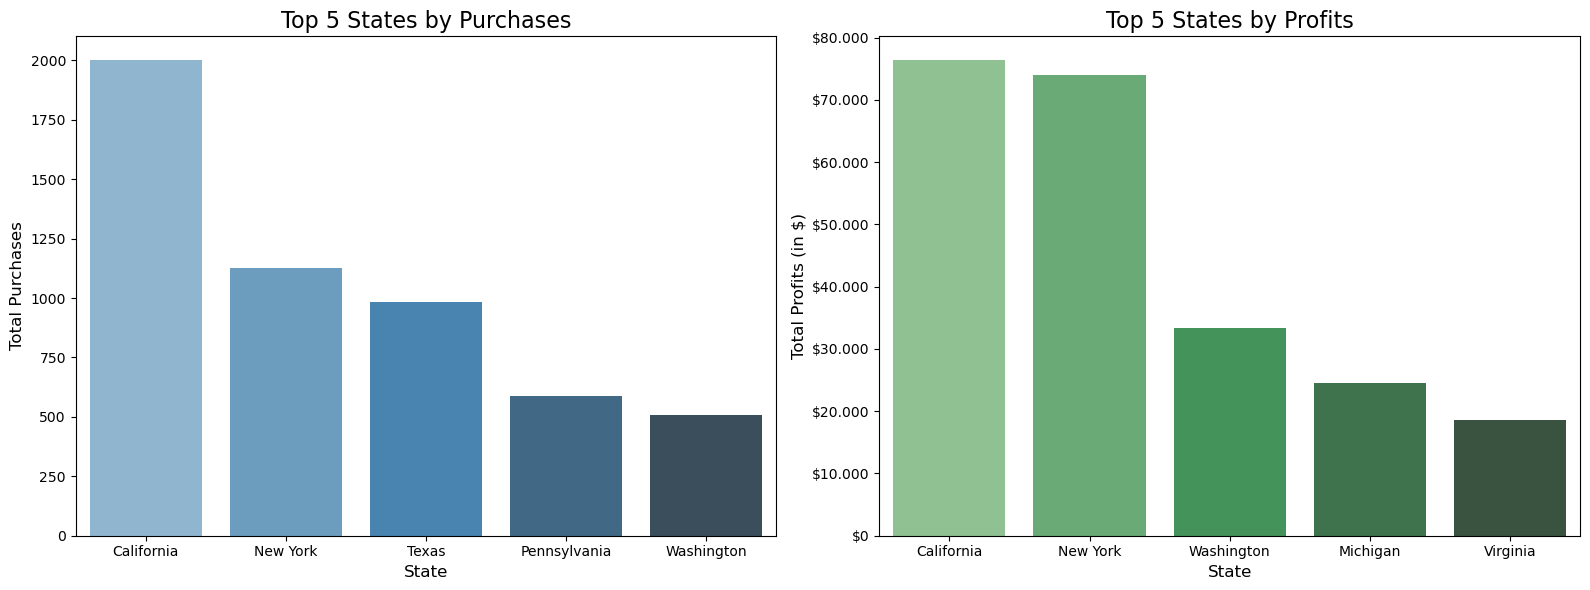

In [832]:
# Group by 'State' to calculate total purchases and total profits
state_purchases = vs_group.groupby('State')['Order ID'].count().reset_index()
state_purchases.rename(columns={'Order ID': 'Total_Purchases'}, inplace=True)

state_profits = vs_group.groupby('State')['Profit'].sum().reset_index()

# Sort data for better visualization
state_purchases = state_purchases.sort_values(by='Total_Purchases', ascending=False)
state_profits = state_profits.sort_values(by='Profit', ascending=False)

# Get top 5 states for purchases and profits
top_5_purchases = state_purchases.head(5)
top_5_profits = state_profits.head(5)

# Display top 5 states
print("Top 5 States by Purchases:")
print(top_5_purchases)

print("\nTop 5 States by Profits:")
print(top_5_profits)

# Define a formatter function for the y-axis (Profit)
def format_dollars(value, _):
    return f"${value:,.0f}".replace(",", ".")

# Visualize the top 5 states
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot top 5 purchases
sns.barplot(x='State', y='Total_Purchases', data=top_5_purchases, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 States by Purchases', fontsize=16)
axes[0].set_xlabel('State', fontsize=12)
axes[0].set_ylabel('Total Purchases', fontsize=12)

# Plot top 5 profits
sns.barplot(x='State', y='Profit', data=top_5_profits, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 5 States by Profits', fontsize=16)
axes[1].set_xlabel('State', fontsize=12)
axes[1].set_ylabel('Total Profits (in $)', fontsize=12)

# Apply dollar formatting to the Profit axis
axes[1].yaxis.set_major_formatter(FuncFormatter(format_dollars))

# Adjust layout
plt.tight_layout()
plt.show()


Total Discount Applied by State:
                   State  Discount
41                 Texas    364.64
36          Pennsylvania    192.90
11              Illinois    191.90
33                  Ohio    152.40
3             California    145.60
8                Florida    114.65
31        North Carolina     70.60
1                Arizona     68.00
30              New York     62.40
4               Colorado     57.60
40             Tennessee     53.30
35                Oregon     35.80
45            Washington     32.40
42                  Utah      3.20
26                Nevada      2.40
29            New Mexico      2.20
19         Massachusetts      2.10
10                 Idaho      1.80
20              Michigan      1.80
37          Rhode Island      1.20
24               Montana      1.00
18              Maryland      0.60
6               Delaware      0.60
5            Connecticut      0.60
28            New Jersey      0.60
27         New Hampshire      0.30
46         West Virgin

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1642382291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='State', data=state_discounts, palette='Oranges_d')


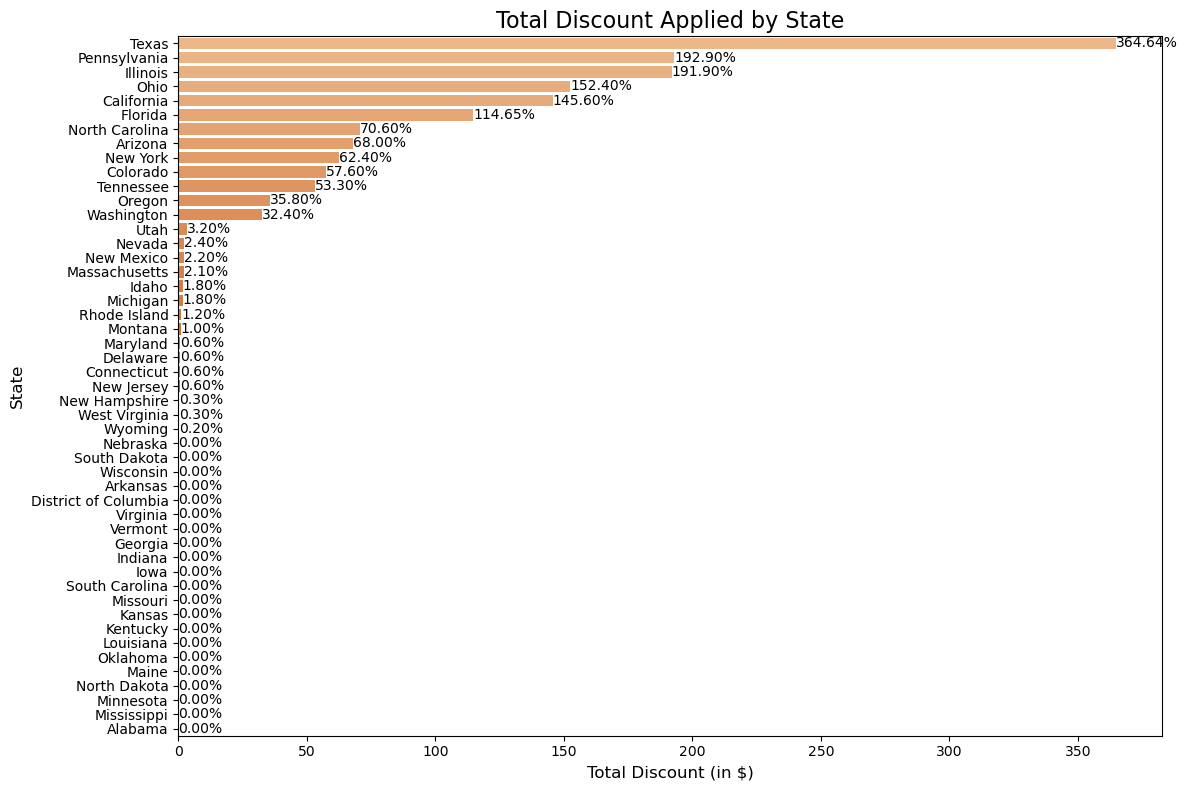

In [833]:
# Group by 'State' to calculate the total discount applied in each state
state_discounts = vs_group.groupby('State')['Discount'].sum().reset_index()

# Sort data for better visualization
state_discounts = state_discounts.sort_values(by='Discount', ascending=False)

# Display total discount applied by state
print("Total Discount Applied by State:")
print(state_discounts)

# Create a better visualization
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with the 'Oranges' color palette
sns.barplot(x='Discount', y='State', data=state_discounts, palette='Oranges_d')

# Add title and labels
plt.title('Total Discount Applied by State', fontsize=16)
plt.xlabel('Total Discount (in $)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Add data labels on the bars with percentage signs
for index, value in enumerate(state_discounts['Discount']):
    plt.text(value, index, f'{value:.2f}%', color='black', ha='left', va='center')

# Show plot with tight layout
plt.tight_layout()
plt.show()


Top 5 States by Total Discount:
           State  Discount
41         Texas    364.64
36  Pennsylvania    192.90
11      Illinois    191.90
33          Ohio    152.40
3     California    145.60


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/3157975263.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Discount', data=state_discounts, palette='Oranges_d')


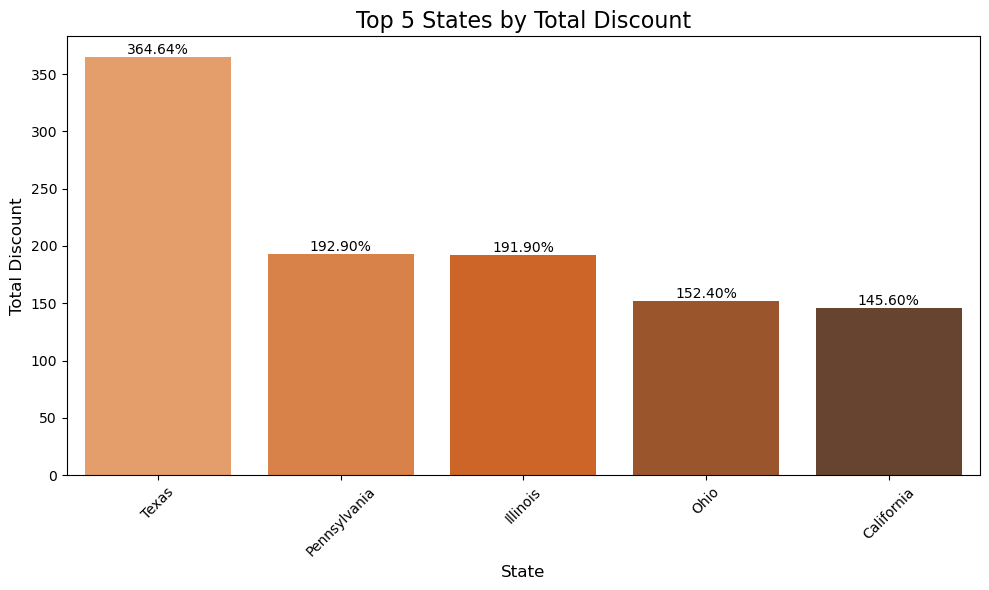

In [834]:
# Group by 'State' to calculate total discount
state_discounts = vs_group.groupby('State')['Discount'].sum().reset_index()

# Sort data to get the top 5 states by discount
state_discounts = state_discounts.sort_values(by='Discount', ascending=False).head(5)

# Display top 5 states by discount
print("Top 5 States by Total Discount:")
print(state_discounts)

# Visualize the top 5 states by total discount
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Discount', data=state_discounts, palette='Oranges_d')
plt.title('Top 5 States by Total Discount', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Discount', fontsize=12)
plt.xticks(rotation=45)

# Add data labels on the bars with percentage signs
for index, value in enumerate(state_discounts['Discount']):
    plt.text(index, value, f'{value:.2f}%', color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Category-wise Discounts and Profits:
          Category  Discount       Profit
0        Furniture    368.89   18451.2728
1  Office Supplies    947.80  122490.8008
2       Technology    244.40  145454.9481


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/2921141229.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Discount', data=category_summary, ax=axes[0], palette='Oranges_d')
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/2921141229.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=category_summary, ax=axes[1], palette='Greens_d')


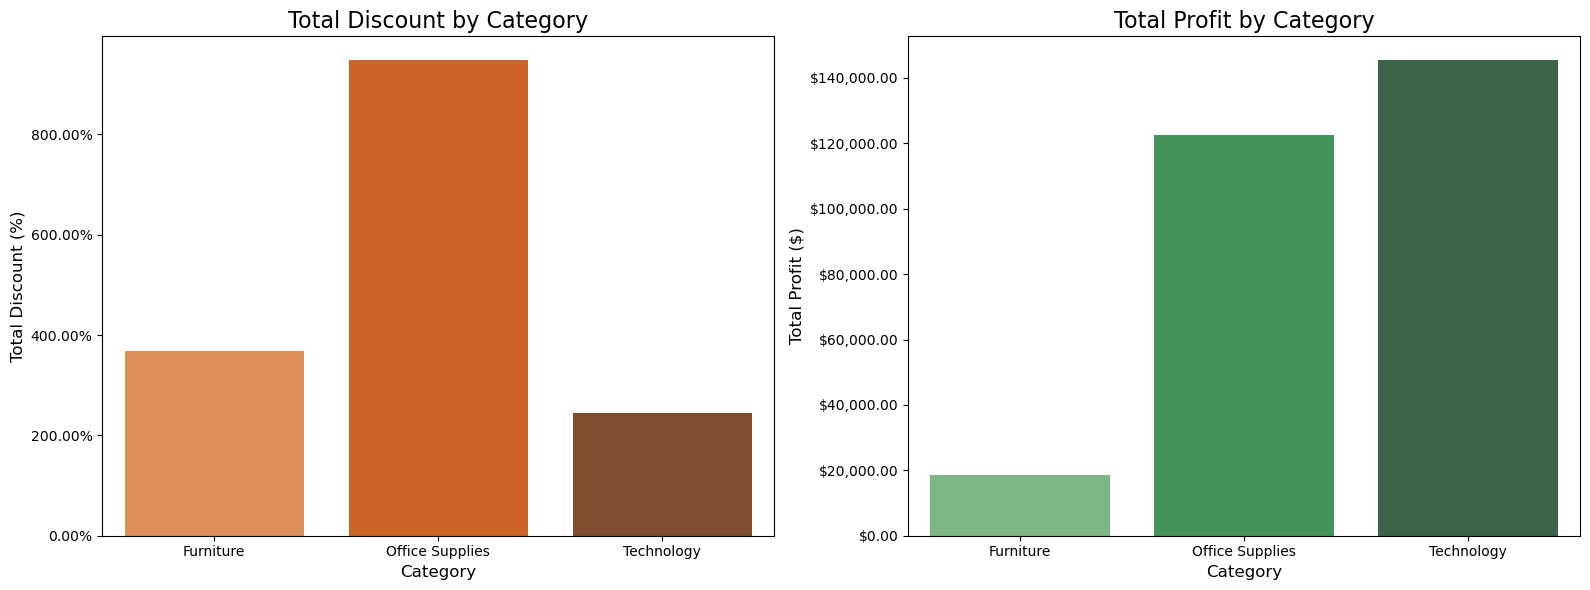

In [835]:
# Group by 'Category' to calculate total discount and total profit
category_summary = vs_group.groupby('Category').agg({'Discount': 'sum', 'Profit': 'sum'}).reset_index()

# Display the summary
print("Category-wise Discounts and Profits:")
print(category_summary)

# Visualize discounts and profits for each category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for total discount by category
sns.barplot(x='Category', y='Discount', data=category_summary, ax=axes[0], palette='Oranges_d')
axes[0].set_title('Total Discount by Category', fontsize=16)
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Total Discount (%)', fontsize=12)
# Add percentage sign to the y-axis of Total Discount plot
axes[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}%'))

# Bar plot for total profit by category
sns.barplot(x='Category', y='Profit', data=category_summary, ax=axes[1], palette='Greens_d')
axes[1].set_title('Total Profit by Category', fontsize=16)
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Total Profit ($)', fontsize=12)
# Add dollar sign to the y-axis of Total Profit plot
axes[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Adjust layout
plt.tight_layout()
plt.show()


Top 5 States by Loss:
             State      Profit
20           Texas -36813.1875
15            Ohio -21750.0002
17    Pennsylvania -21602.8515
6         Illinois -19501.6975
14  North Carolina -11557.9854


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/992320441.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=top_5_losses, palette='Reds_d')


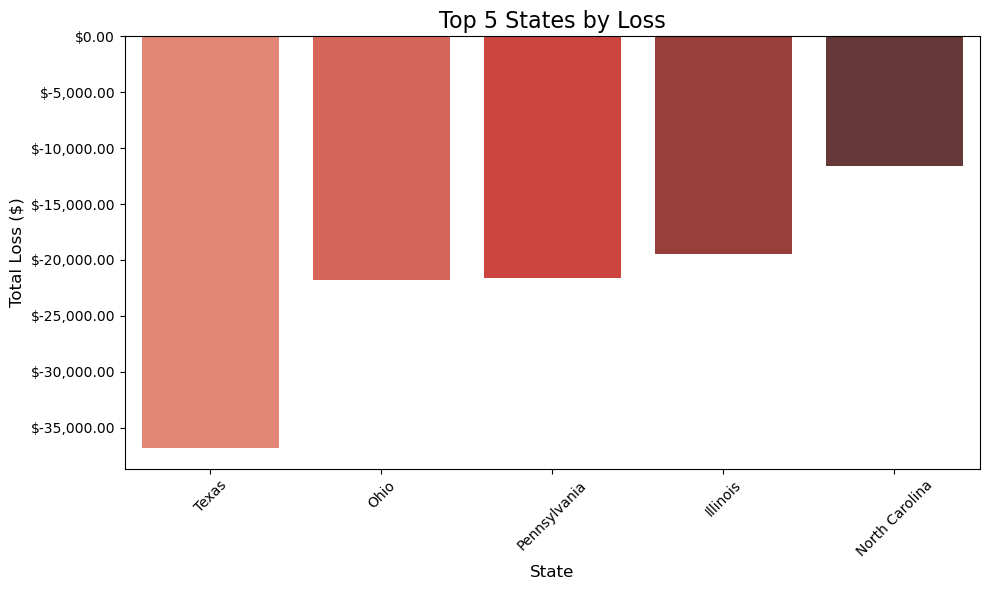

In [836]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Group by 'State' and calculate total loss
state_losses = loss_data.groupby('State')['Profit'].sum().reset_index()

# Sort by loss (ascending order of Profit)
state_losses = state_losses.sort_values(by='Profit')

# Get the top 5 states by absolute loss
top_5_losses = state_losses.head(5)

# Display top 5 states by loss
print("Top 5 States by Loss:")
print(top_5_losses)

# Visualize the top 5 states by loss
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Profit', data=top_5_losses, palette='Reds_d')

# Customize the plot
plt.title('Top 5 States by Loss', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loss ($)', fontsize=12)
plt.xticks(rotation=45)

# Format the y-axis labels with a dollar sign
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Show the plot
plt.tight_layout()
plt.show()


Top 5 States by Loss:
             State      Profit
20           Texas -36813.1875
15            Ohio -21750.0002
17    Pennsylvania -21602.8515
6         Illinois -19501.6975
14  North Carolina -11557.9854

Total Loss (Top 5 States Combined): $-111,225.72


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/2460961409.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=top_5_losses, palette='Reds_d')


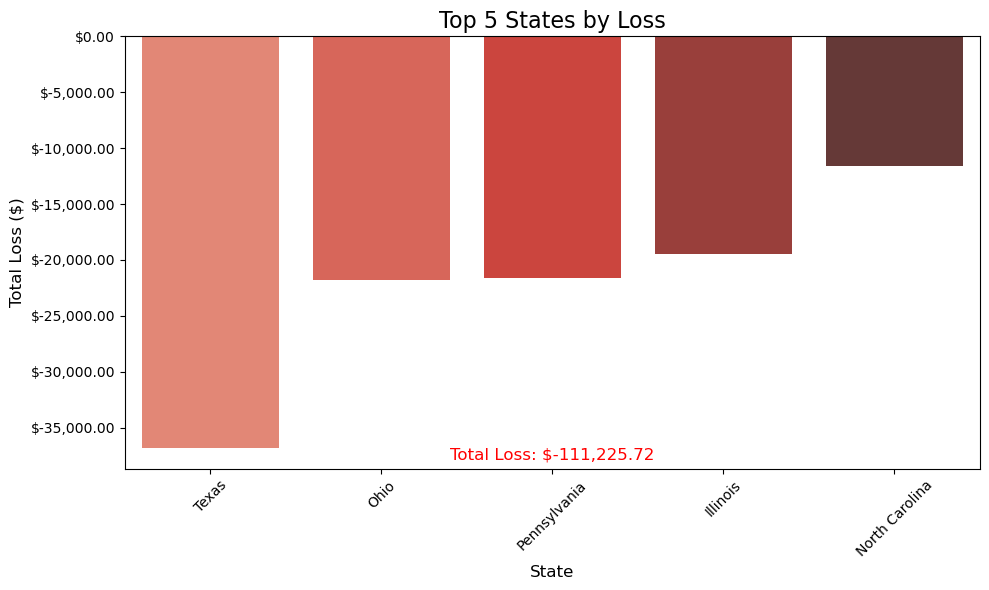

In [837]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Group by 'State' and calculate total loss
state_losses = loss_data.groupby('State')['Profit'].sum().reset_index()

# Sort by loss (ascending order of Profit)
state_losses = state_losses.sort_values(by='Profit')

# Get the top 5 states by absolute loss
top_5_losses = state_losses.head(5)

# Calculate the total loss for the top 5 states
total_loss_top_5 = top_5_losses['Profit'].sum()

# Display top 5 states by loss
print("Top 5 States by Loss:")
print(top_5_losses)
print(f"\nTotal Loss (Top 5 States Combined): ${total_loss_top_5:,.2f}")

# Visualize the top 5 states by loss
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Profit', data=top_5_losses, palette='Reds_d')

# Customize the plot
plt.title('Top 5 States by Loss', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loss ($)', fontsize=12)
plt.xticks(rotation=45)

# Format the y-axis labels with a dollar sign
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Add the total loss as a text annotation above the plot
plt.text(
    2,  # x-coordinate (center of the plot)
    top_5_losses['Profit'].min() - 1000,  # y-coordinate (just below the lowest bar)
    f"Total Loss: ${total_loss_top_5:,.2f}",
    fontsize=12,
    color='red',
    ha='center'
)

# Show the plot
plt.tight_layout()
plt.show()


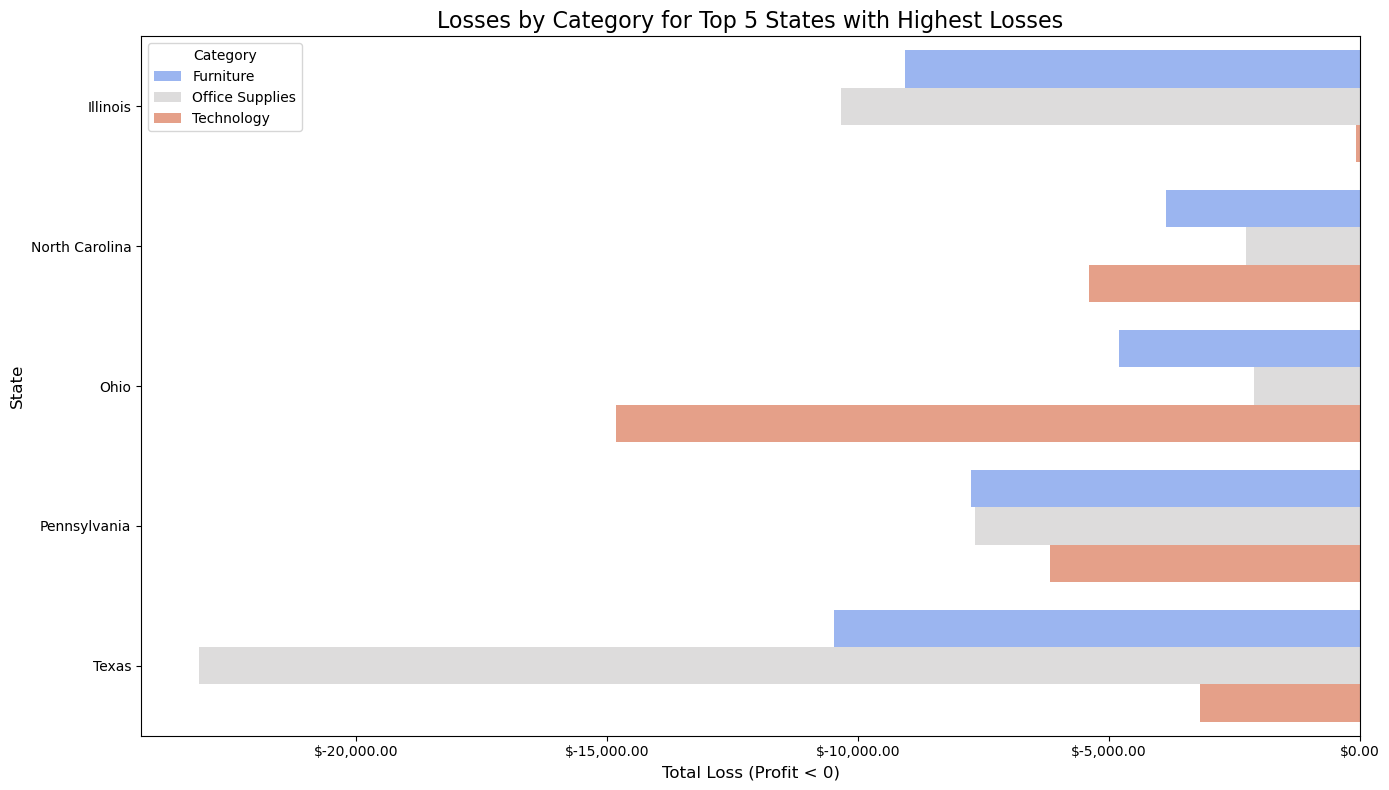

In [838]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Group by 'State' to calculate total losses
state_losses = loss_data.groupby('State')['Profit'].sum().reset_index()

# Sort by total loss and get the top 5 states
top_5_loss_states = state_losses.sort_values(by='Profit').head(5)['State']

# Filter loss data for the top 5 states
top_5_loss_data = loss_data[loss_data['State'].isin(top_5_loss_states)]

# Group by 'State' and 'Category' to calculate total losses
top_5_state_category_losses = top_5_loss_data.groupby(['State', 'Category'])['Profit'].sum().reset_index()

# Visualize the losses for each category in the top 5 states
plt.figure(figsize=(14, 8))
sns.barplot(x='Profit', y='State', hue='Category', data=top_5_state_category_losses, palette='coolwarm', orient='h')

# Add titles and labels
plt.title('Losses by Category for Top 5 States with Highest Losses', fontsize=16)
plt.xlabel('Total Loss (Profit < 0)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Adjust the legend position to top left corner
plt.legend(title='Category', fontsize=10, loc='upper left', bbox_to_anchor=(0, 1))

# Format the x-axis labels with a dollar sign and proper formatting
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Show the plot
plt.tight_layout()
plt.show()


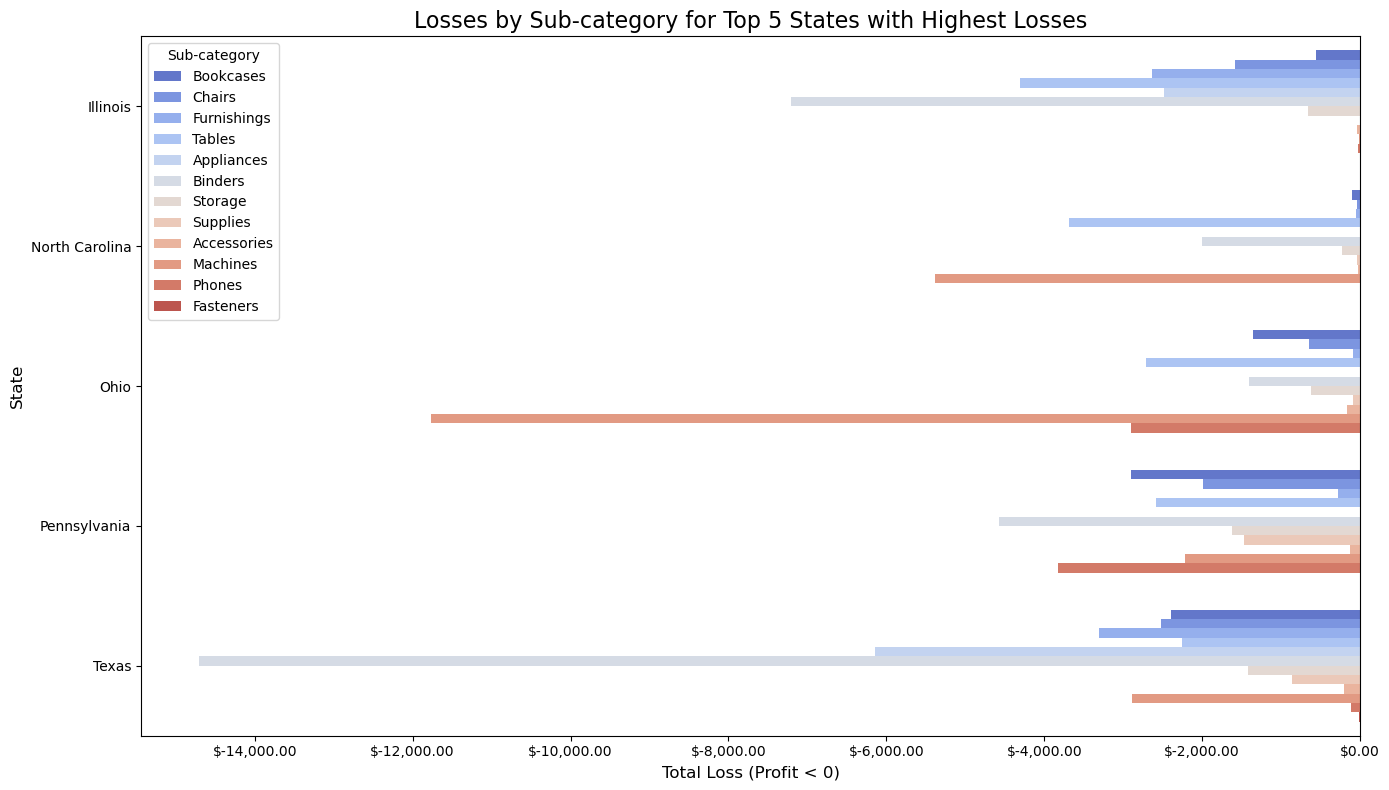

In [839]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Group by 'State' to calculate total losses
state_losses = loss_data.groupby('State')['Profit'].sum().reset_index()

# Sort by total loss and get the top 5 states (states with the highest losses)
top_5_loss_states = state_losses.sort_values(by='Profit').head(5)['State']

# Filter loss data for the top 5 states
top_5_loss_data = loss_data[loss_data['State'].isin(top_5_loss_states)]

# Group by 'State', 'Category', and 'Sub-Category' to calculate total losses
top_5_state_category_subcategory_losses = top_5_loss_data.groupby(['State', 'Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Visualize the losses by Sub-category for each Category in the top 5 states
plt.figure(figsize=(14, 8))

# Create the bar plot, with 'Sub-Category' as hue, and 'Profit' as the x-axis (losses)
sns.barplot(x='Profit', y='State', hue='Sub-Category', data=top_5_state_category_subcategory_losses, palette='coolwarm', orient='h')

# Add titles and labels
plt.title('Losses by Sub-category for Top 5 States with Highest Losses', fontsize=16)
plt.xlabel('Total Loss (Profit < 0)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Adjust the legend position to the top-left corner
plt.legend(title='Sub-category', fontsize=10, loc='upper left', bbox_to_anchor=(0, 1))

# Format the x-axis labels with a dollar sign and proper formatting
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

# Show the plot
plt.tight_layout()
plt.show()


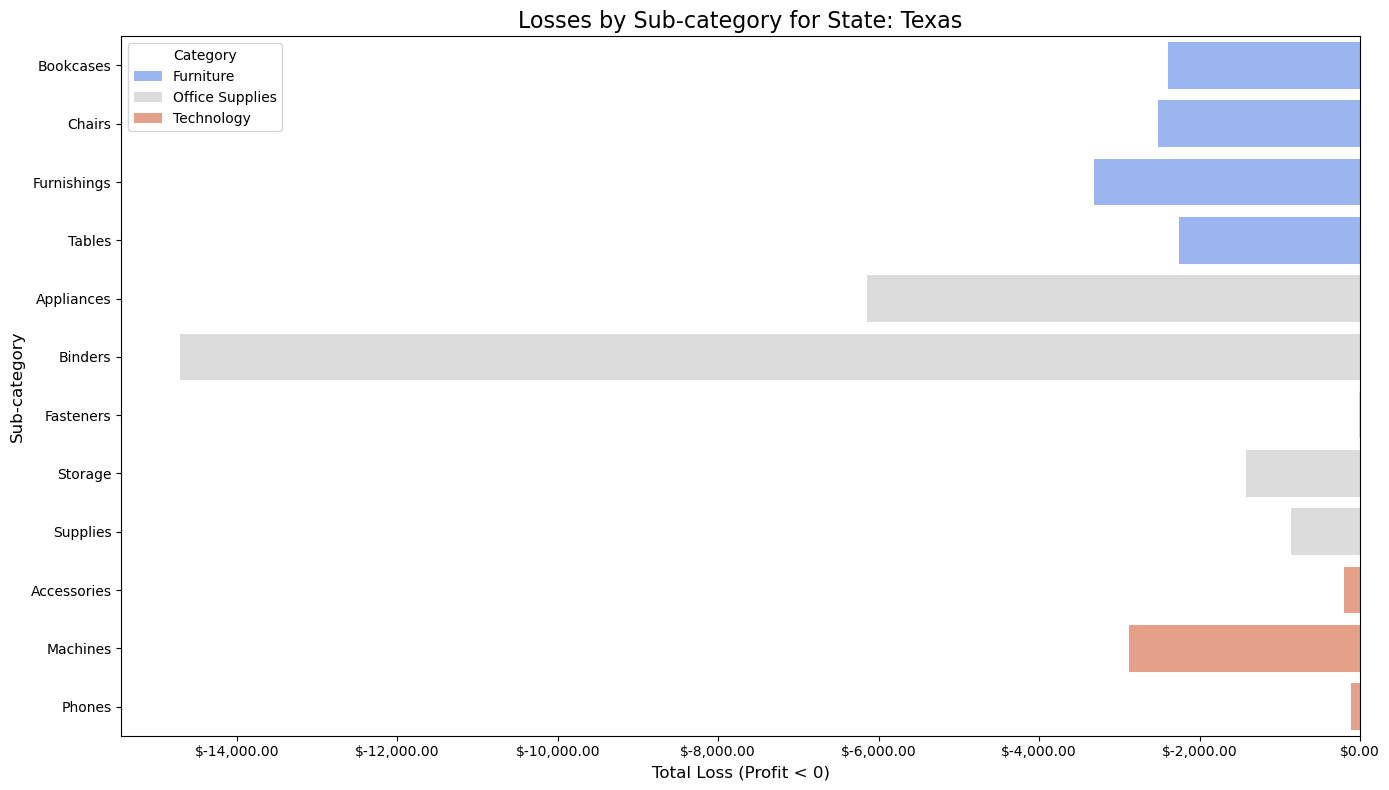

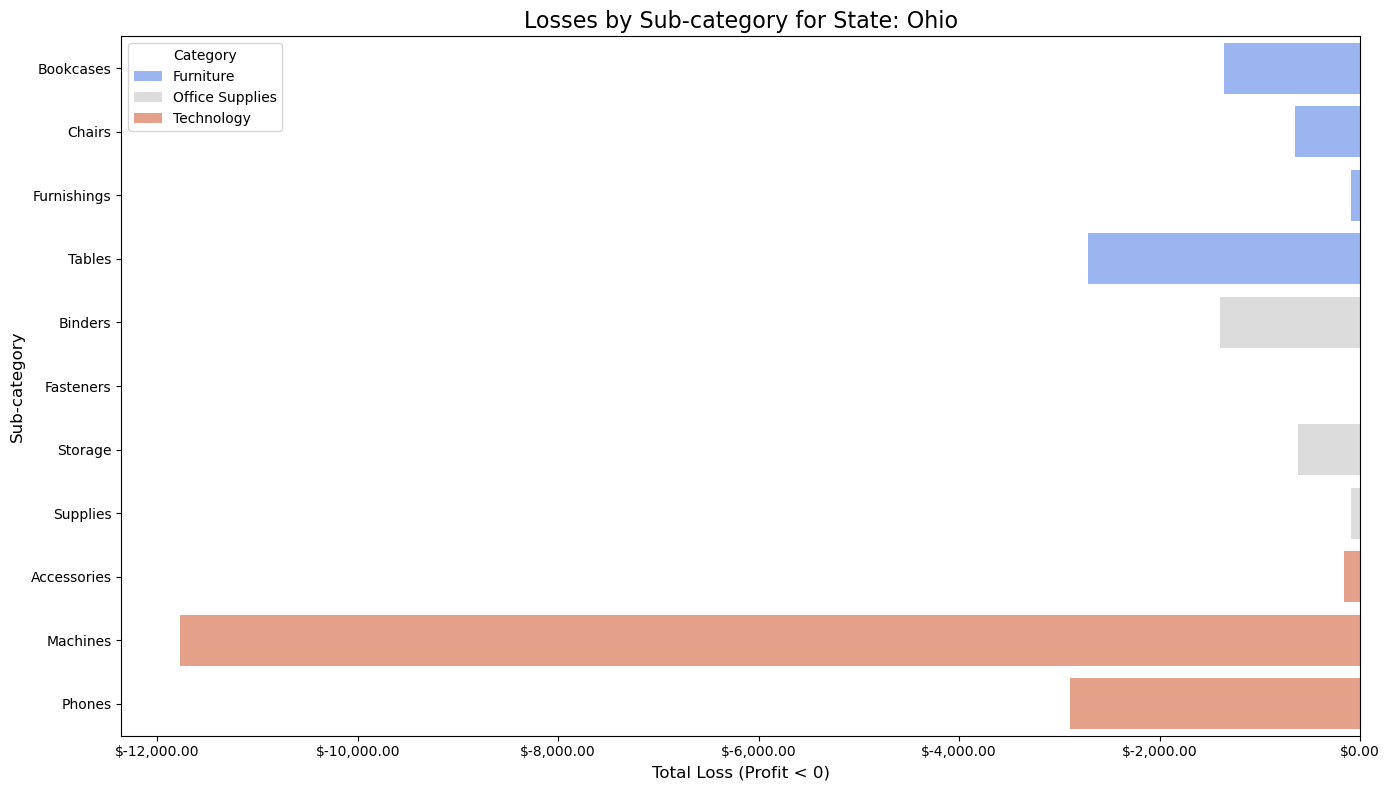

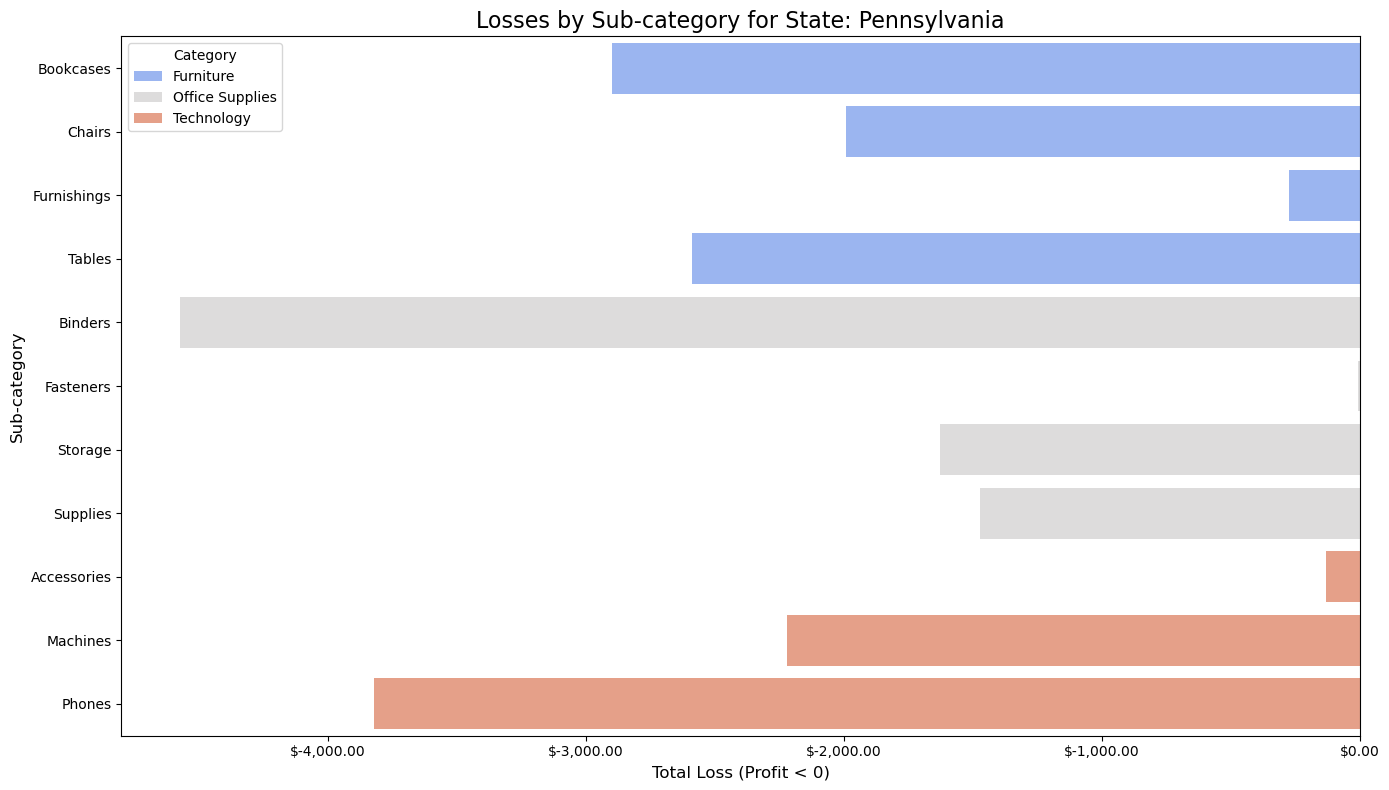

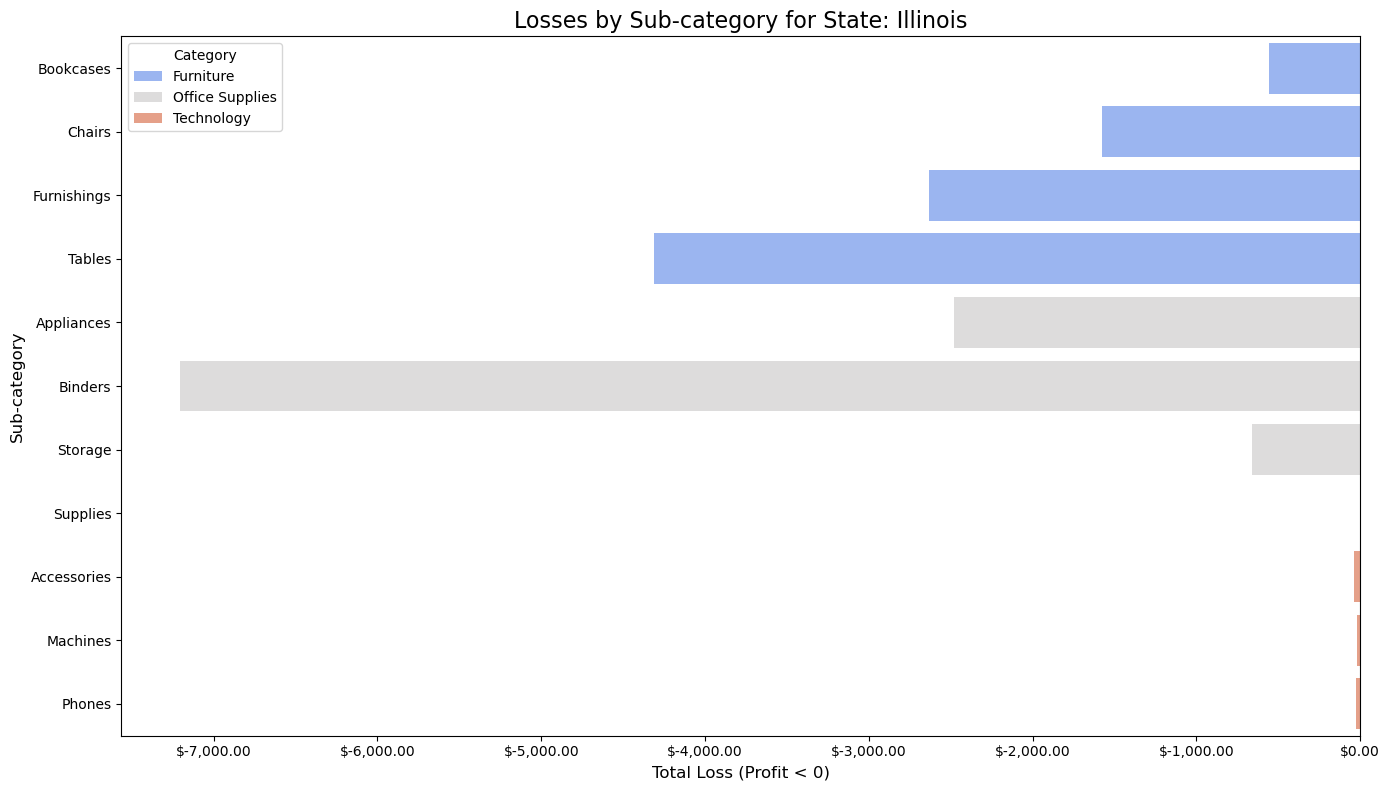

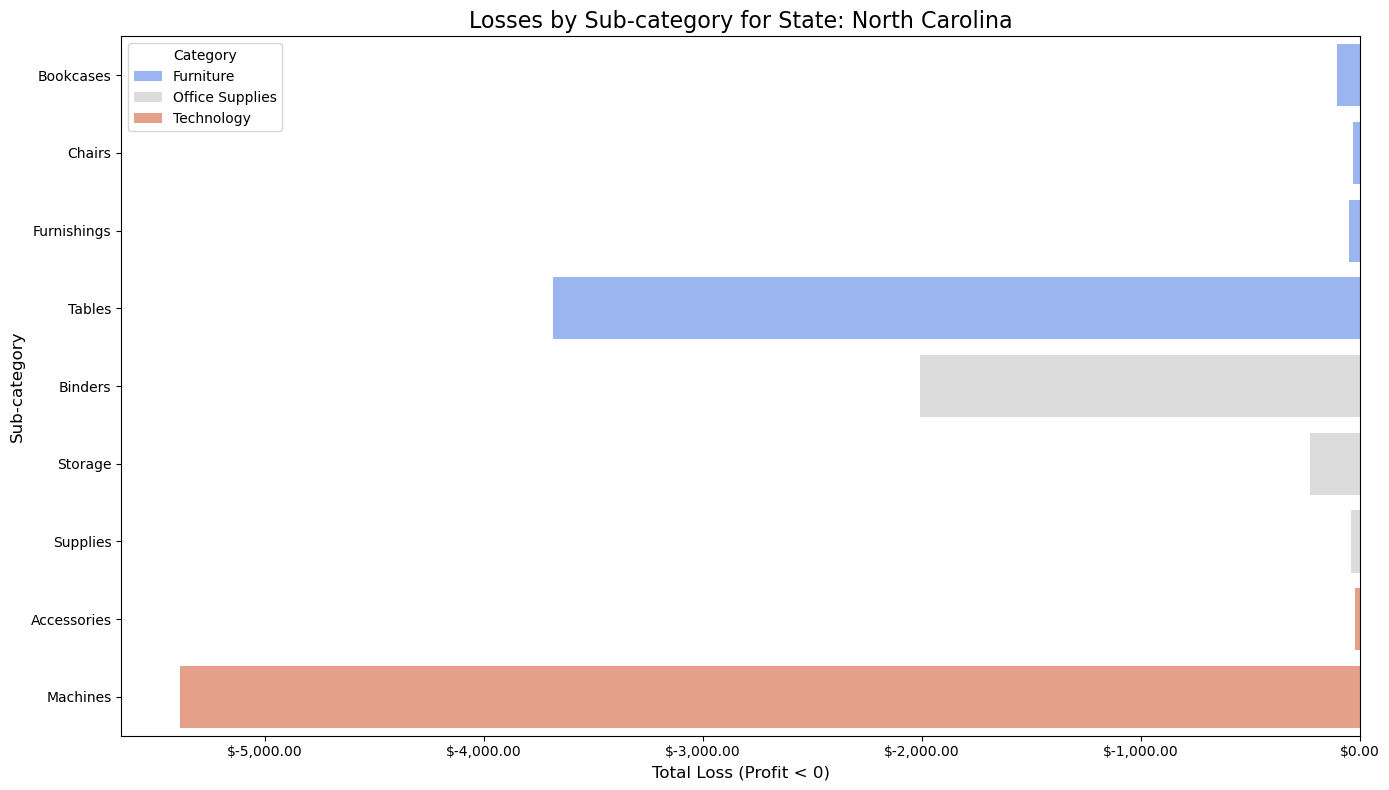

In [840]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Group by 'State' to calculate total losses
state_losses = loss_data.groupby('State')['Profit'].sum().reset_index()

# Sort by total loss and get the top 5 states (states with the highest losses)
top_5_loss_states = state_losses.sort_values(by='Profit').head(5)['State']

# Filter loss data for the top 5 states
top_5_loss_data = loss_data[loss_data['State'].isin(top_5_loss_states)]

# Group by 'State', 'Category', and 'Sub-Category' to calculate total losses
top_5_state_category_subcategory_losses = top_5_loss_data.groupby(['State', 'Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Create a plot for each state in the top 5 states
for state in top_5_loss_states:
    # Filter data for the current state
    state_data = top_5_state_category_subcategory_losses[top_5_state_category_subcategory_losses['State'] == state]
    
    # Create the plot for the current state
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Profit', y='Sub-Category', hue='Category', data=state_data, palette='coolwarm', orient='h')
    
    # Add titles and labels
    plt.title(f'Losses by Sub-category for State: {state}', fontsize=16)
    plt.xlabel('Total Loss (Profit < 0)', fontsize=12)
    plt.ylabel('Sub-category', fontsize=12)

    # Adjust the legend position to the top-left corner
    plt.legend(title='Category', fontsize=10, loc='upper left', bbox_to_anchor=(0, 1))

    # Format the x-axis labels with a dollar sign and proper formatting
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


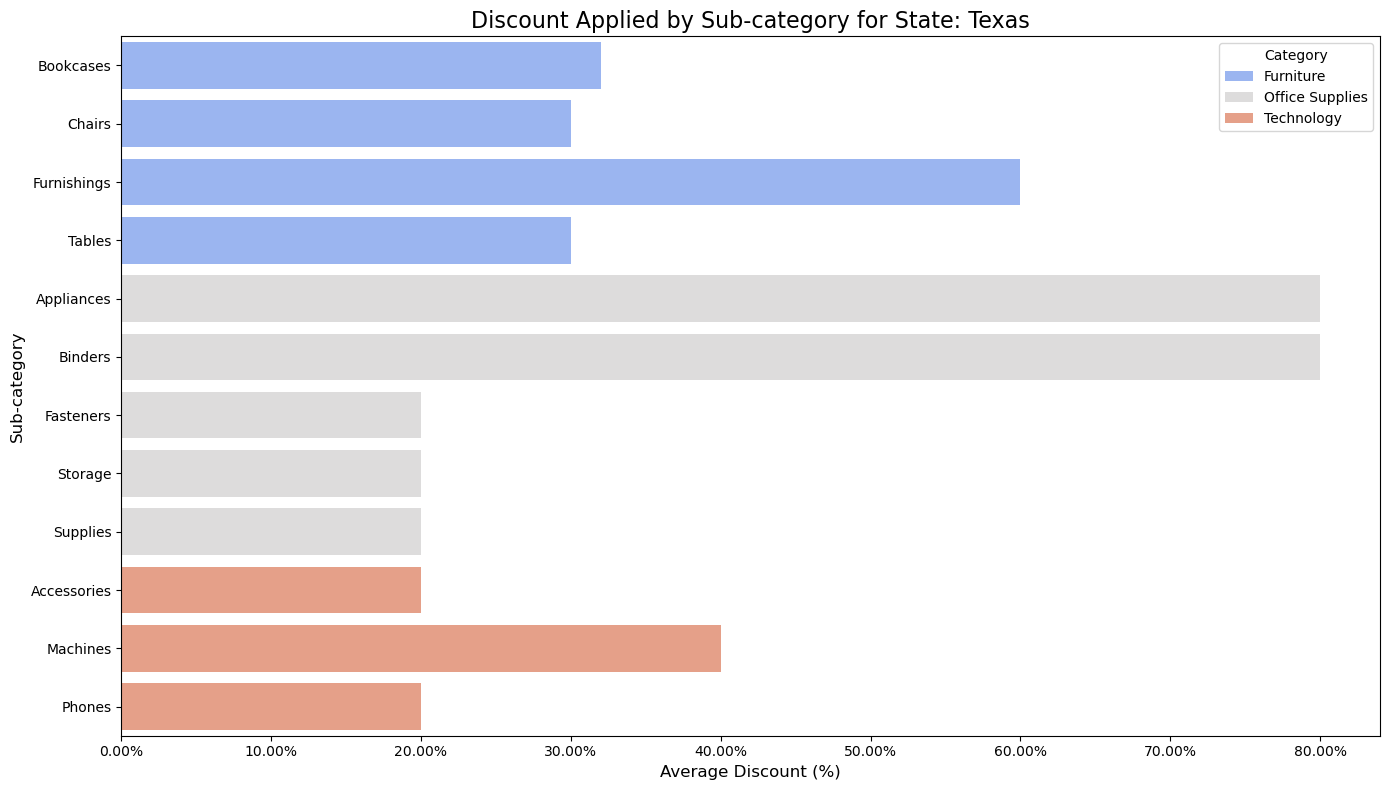

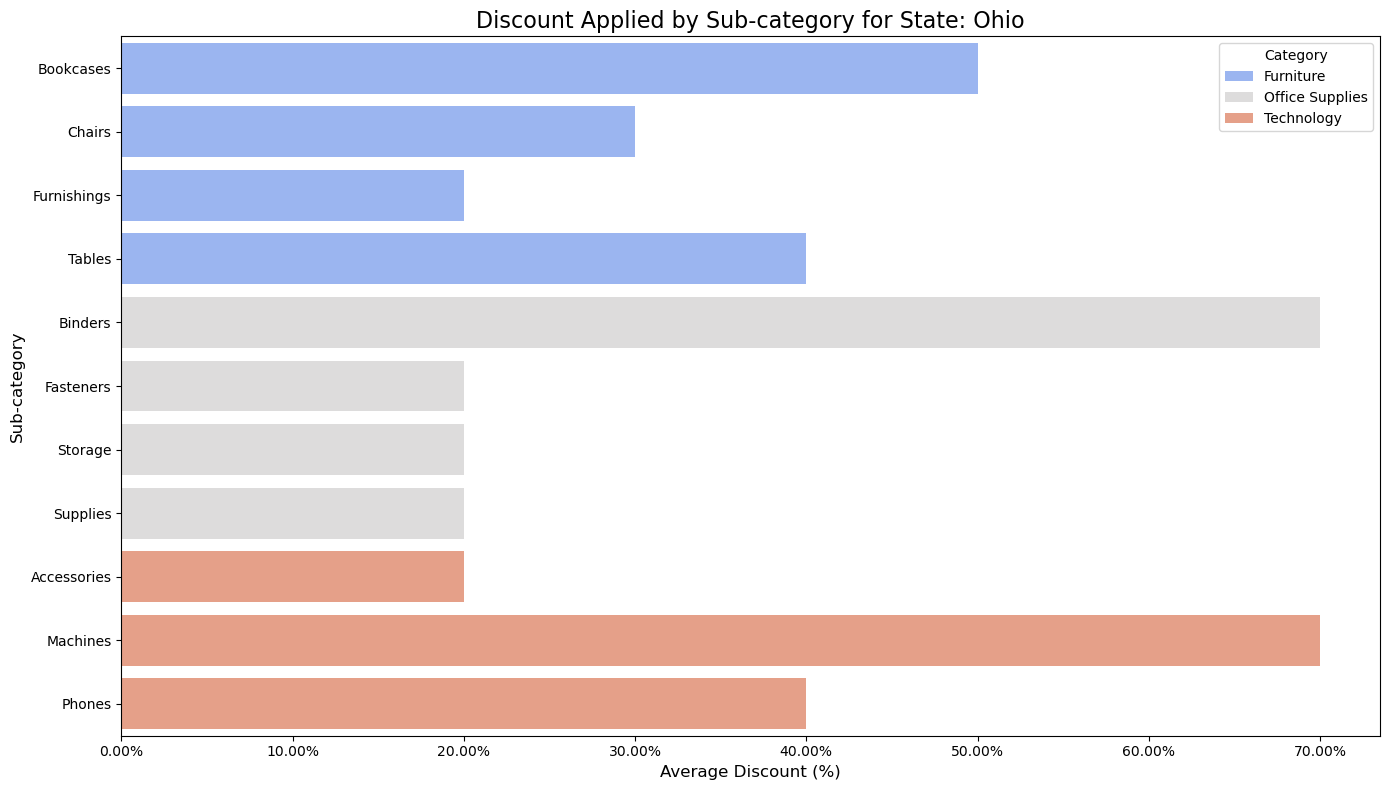

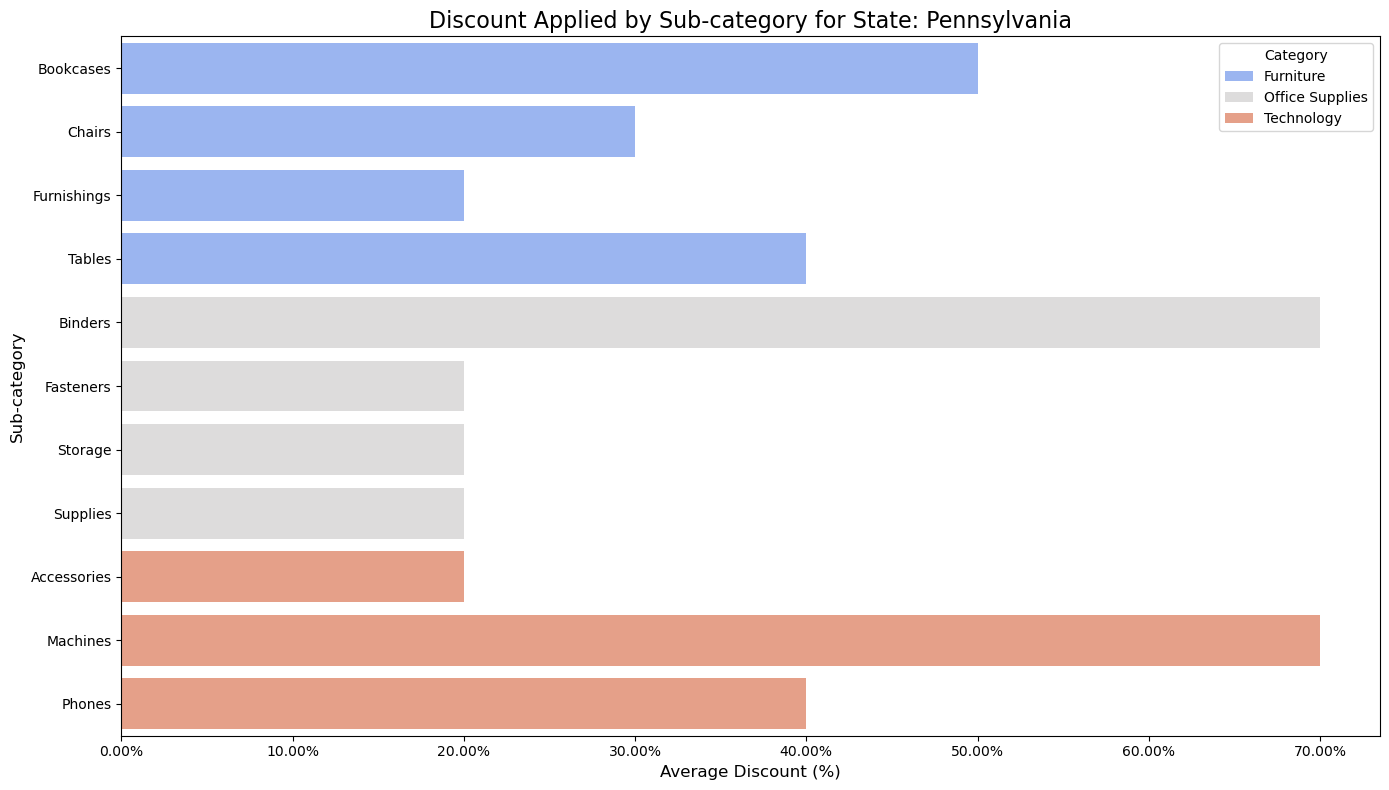

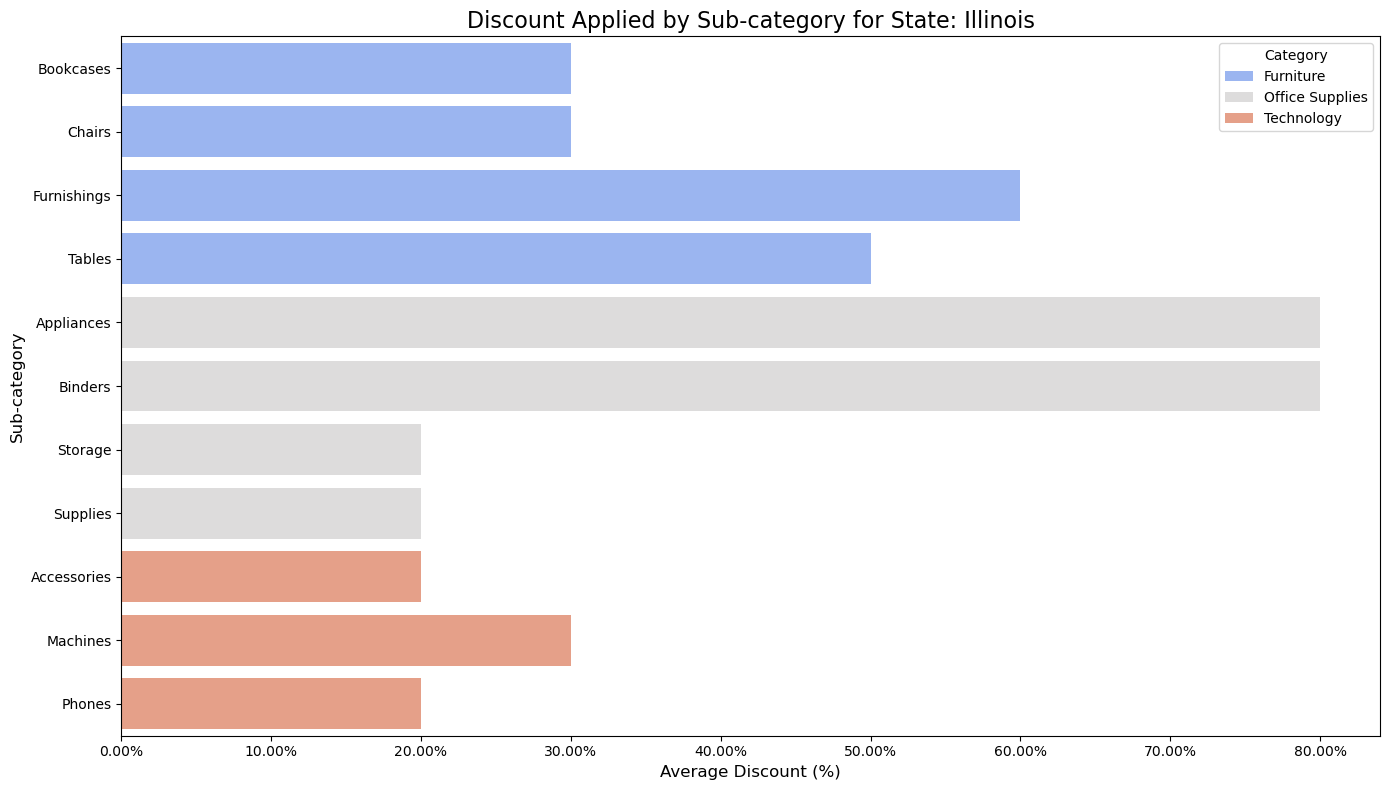

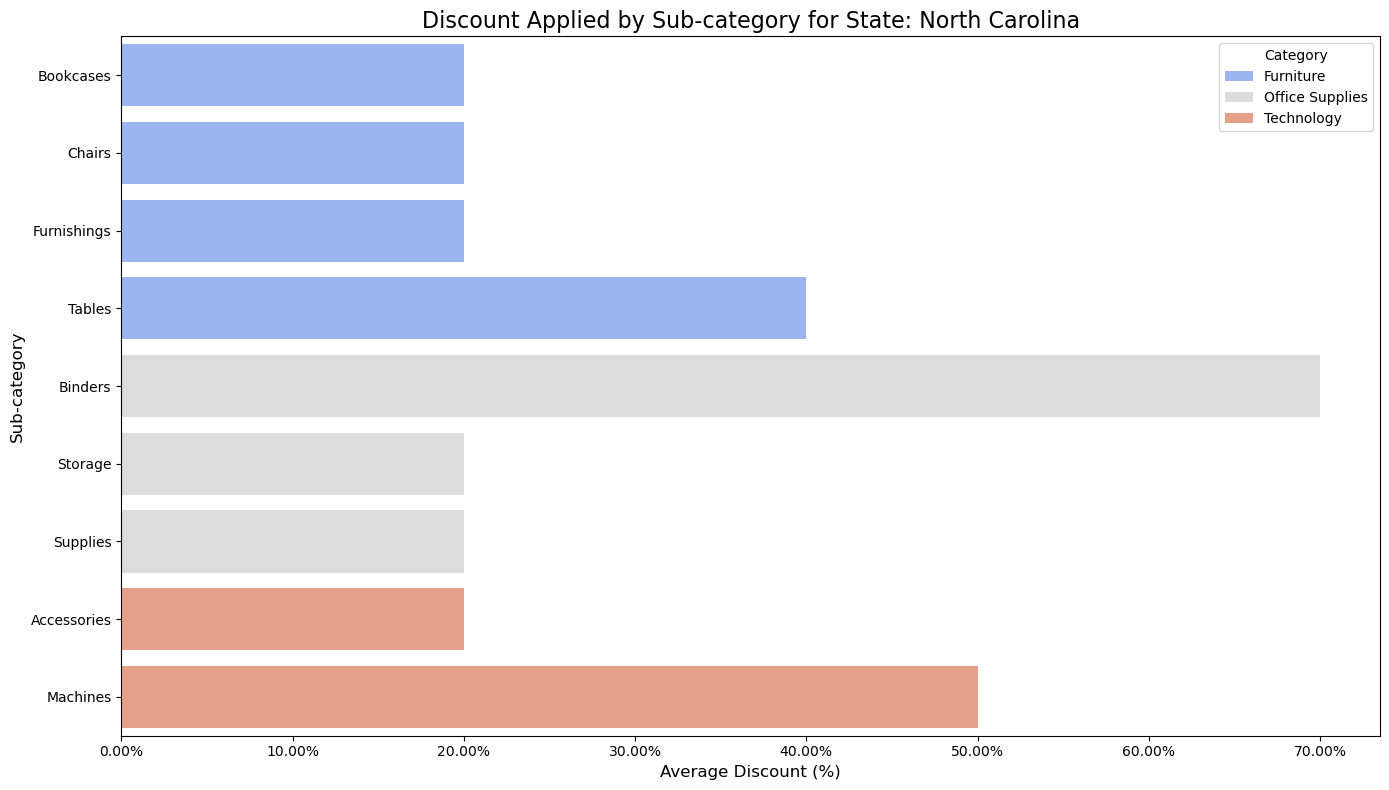

In [841]:
# Filter for rows with losses (negative profit)
loss_data = vs_group[vs_group['Profit'] < 0]

# Define the top 5 states (Texas, Ohio, Pennsylvania, Illinois, North Carolina)
top_5_loss_states = ['Texas', 'Ohio', 'Pennsylvania', 'Illinois', 'North Carolina']

# Filter loss data for the top 5 states
top_5_loss_data = loss_data[loss_data['State'].isin(top_5_loss_states)]

# Group by 'State', 'Category', and 'Sub-Category' to calculate the average discount
top_5_state_category_subcategory_discounts = top_5_loss_data.groupby(['State', 'Category', 'Sub-Category'])['Discount'].mean().reset_index()

# Create a plot for each state in the top 5 states
for state in top_5_loss_states:
    # Filter data for the current state
    state_data = top_5_state_category_subcategory_discounts[top_5_state_category_subcategory_discounts['State'] == state]
    
    # Create the plot for the current state
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Discount', y='Sub-Category', hue='Category', data=state_data, palette='coolwarm', orient='h')
    
    # Add titles and labels
    plt.title(f'Discount Applied by Sub-category for State: {state}', fontsize=16)
    plt.xlabel('Average Discount (%)', fontsize=12)
    plt.ylabel('Sub-category', fontsize=12)

    # Adjust the legend position to the top-right corner
    plt.legend(title='Category', fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))

    # Format the x-axis labels as percentages
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.2f}%'))

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


In [842]:
N_vs_group = vs_group.groupby('State', as_index=False).agg({
    'Sales': 'sum',      # Total Sales
    'Discount': 'mean',  # Average Discount
    'Profit': 'sum'      # Total Profit
})

# Display the first few rows of the resulting DataFrame
print(N_vs_group.head())


        State        Sales  Discount      Profit
0     Alabama   19510.6400  0.000000   5786.8253
1     Arizona   35282.0010  0.303571  -3427.9246
2    Arkansas   11678.1300  0.000000   4008.6871
3  California  457687.6315  0.072764  76381.3871
4    Colorado   32108.1180  0.316484  -6527.8579


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/1167094999.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')


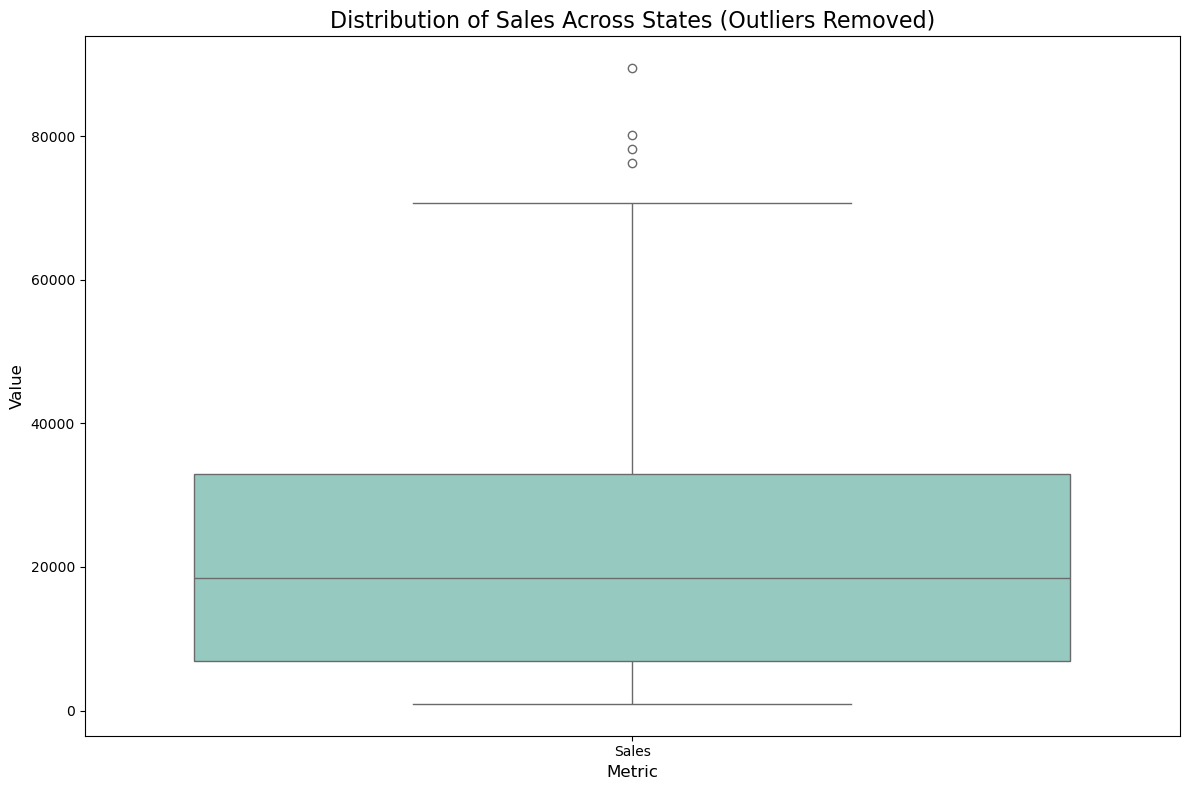

In [843]:
# Group by 'State' and calculate relevant metrics
N_vs_group = vs_group.groupby('State', as_index=False).agg({
    'Sales': 'sum'
})

# Calculate the IQR for 'Sales'
Q1 = N_vs_group['Sales'].quantile(0.25)  # First quartile
Q3 = N_vs_group['Sales'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                           # Interquartile range

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Sales' is an outlier
filtered_data = N_vs_group[(N_vs_group['Sales'] >= lower_bound) & (N_vs_group['Sales'] <= upper_bound)]

# Create a long-form DataFrame for box plot visualization
long_format_data = filtered_data.melt(id_vars='State', 
                                      value_vars=['Sales'], 
                                      var_name='Metric', 
                                      value_name='Value')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to visualize data without outliers
sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')

# Customize the plot
plt.title('Distribution of Sales Across States (Outliers Removed)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/2394033119.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')


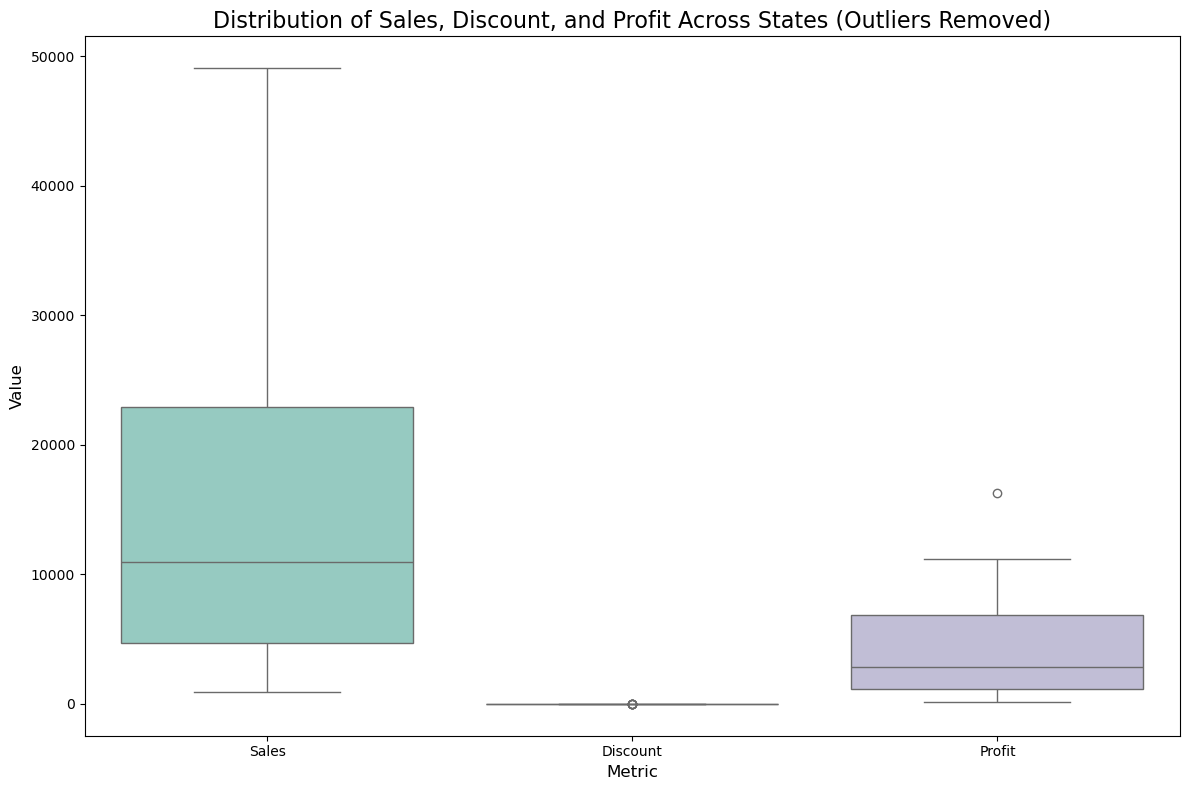

In [844]:
# Group by 'State' and calculate relevant metrics
N_vs_group = vs_group.groupby('State', as_index=False).agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
})

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each metric
N_vs_group_no_outliers = N_vs_group.copy()
for metric in ['Sales', 'Discount', 'Profit']:
    N_vs_group_no_outliers = remove_outliers(N_vs_group_no_outliers, metric)

# Create a long-form DataFrame for box plot visualization
long_format_data = N_vs_group_no_outliers.melt(id_vars='State', 
                                               value_vars=['Sales', 'Discount', 'Profit'], 
                                               var_name='Metric', 
                                               value_name='Value')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to visualize data without outliers
sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')

# Customize the plot
plt.title('Distribution of Sales, Discount, and Profit Across States (Outliers Removed)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/782720001.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')


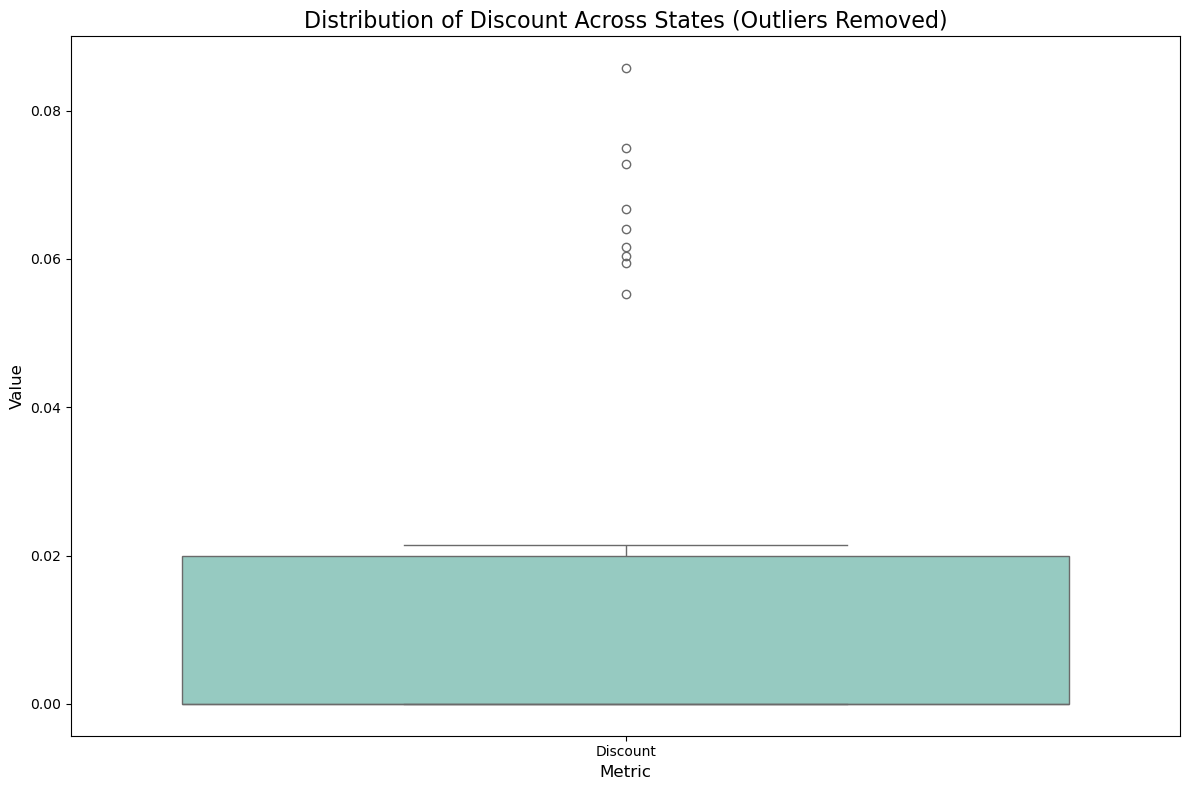

In [845]:
# Group by 'State' and calculate relevant metrics
N_vs_group = vs_group.groupby('State', as_index=False).agg({
    'Discount': 'mean'
})

# Calculate the IQR for 'Sales'
Q1 = N_vs_group['Discount'].quantile(0.25)  # First quartile
Q3 = N_vs_group['Discount'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                           # Interquartile range

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Sales' is an outlier
filtered_data = N_vs_group[(N_vs_group['Discount'] >= lower_bound) & (N_vs_group['Discount'] <= upper_bound)]

# Create a long-form DataFrame for box plot visualization
long_format_data = filtered_data.melt(id_vars='State', 
                                      value_vars=['Discount'], 
                                      var_name='Metric', 
                                      value_name='Value')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to visualize data without outliers
sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')

# Customize the plot
plt.title('Distribution of Discount Across States (Outliers Removed)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_37093/2394033119.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')


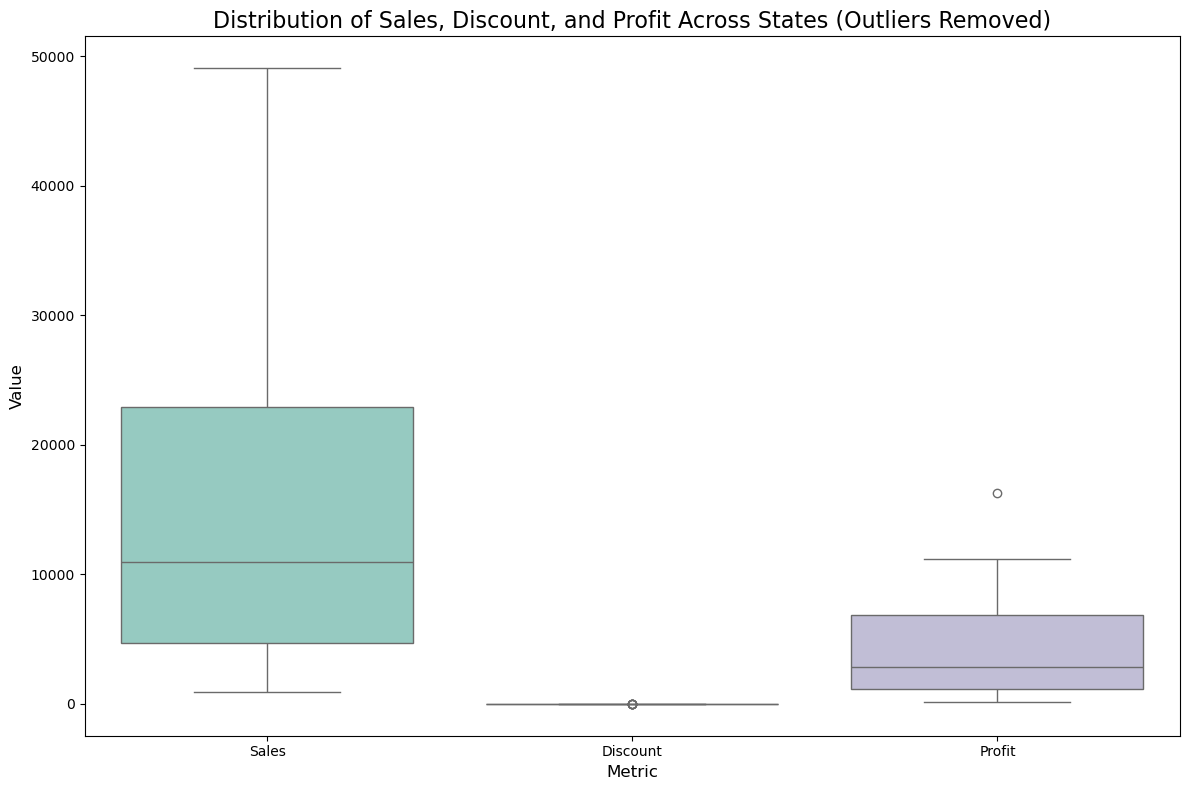

In [846]:
# Group by 'State' and calculate relevant metrics
N_vs_group = vs_group.groupby('State', as_index=False).agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
})

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each metric
N_vs_group_no_outliers = N_vs_group.copy()
for metric in ['Sales', 'Discount', 'Profit']:
    N_vs_group_no_outliers = remove_outliers(N_vs_group_no_outliers, metric)

# Create a long-form DataFrame for box plot visualization
long_format_data = N_vs_group_no_outliers.melt(id_vars='State', 
                                               value_vars=['Sales', 'Discount', 'Profit'], 
                                               var_name='Metric', 
                                               value_name='Value')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to visualize data without outliers
sns.boxplot(x='Metric', y='Value', data=long_format_data, palette='Set3')

# Customize the plot
plt.title('Distribution of Sales, Discount, and Profit Across States (Outliers Removed)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [847]:
# Rescaling the attributes
N_vs_group = N_vs_group[['Sales', 'Discount', 'Profit']]

# Instantiate
scaler = StandardScaler()

# fit_transform
N_vs_group_df_scaled = scaler.fit_transform(N_vs_group)
N_vs_group_df_scaled.shape

N_vs_group_df_scaled = pd.DataFrame(N_vs_group_df_scaled)
N_vs_group_df_scaled.columns = ['Sales', 'Discount', 'Profit']
N_vs_group_df_scaled.head()

,Sales,Discount,Profit
0,-0.342361,-0.661125,-0.003355
1,-0.145090,1.751223,-0.536324
2,-0.440331,-0.661125,-0.106201
3,5.138428,-0.082905,4.079741
4,-0.184790,1.853830,-0.715620


In [848]:


# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(N_vs_group_df_scaled)


KMeans(max_iter=50, n_clusters=3)

In [849]:
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(np.int32(0), 2), (np.int32(1), 36), (np.int32(2), 11)]

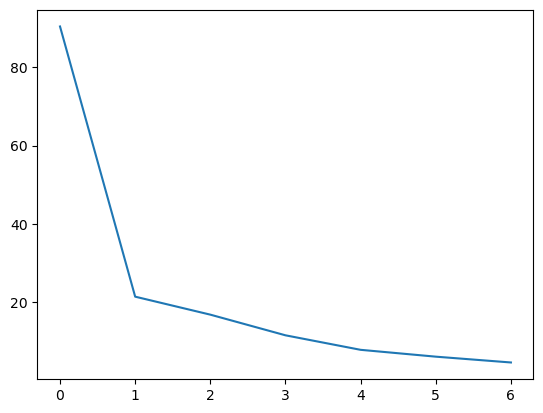

In [850]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(N_vs_group_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [851]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(N_vs_group_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(N_vs_group_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7688447442267669
For n_clusters=3, the silhouette score is 0.7210584988257244
For n_clusters=4, the silhouette score is 0.6372232684486542
For n_clusters=5, the silhouette score is 0.5951142285845962
For n_clusters=6, the silhouette score is 0.5698641181577413
For n_clusters=7, the silhouette score is 0.47414575832649863
For n_clusters=8, the silhouette score is 0.47531613133397005


In [852]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(N_vs_group_df_scaled)


KMeans(max_iter=100, n_clusters=2)

In [853]:
# assign the label
N_vs_group['Cluster_Id'] = kmeans.labels_
N_vs_group.head()

,Sales,Discount,Profit,Cluster_Id
0,19510.6400,0.000000,5786.8253,0
1,35282.0010,0.303571,-3427.9246,1
2,11678.1300,0.000000,4008.6871,0
3,457687.6315,0.072764,76381.3871,0
4,32108.1180,0.316484,-6527.8579,1


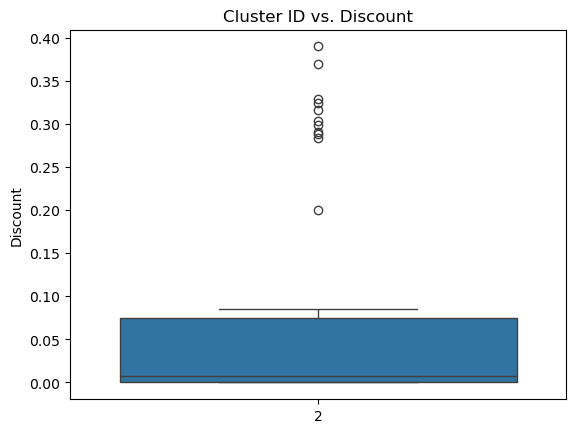

In [854]:
sns.boxplot(x=2, y='Discount', data=N_vs_group)
plt.title('Cluster ID vs. Discount')
plt.show()


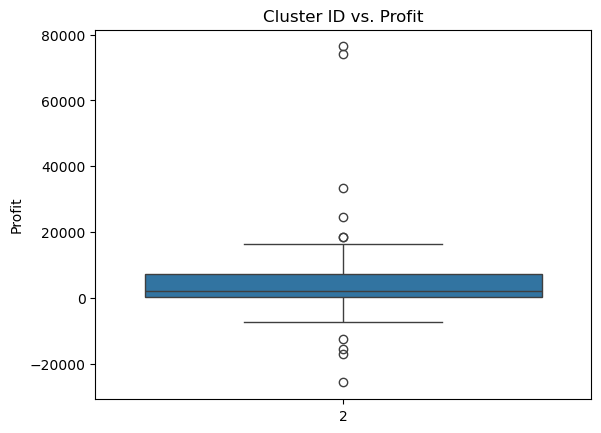

In [855]:
sns.boxplot(x=2, y='Profit', data=N_vs_group)
plt.title('Cluster ID vs. Profit')
plt.show()


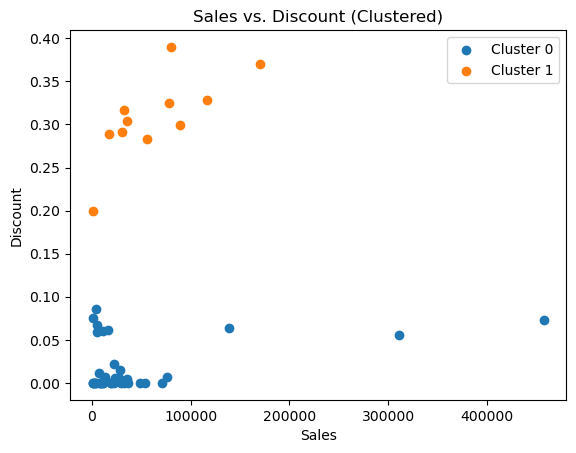

In [856]:
import matplotlib.pyplot as plt

# Iterate through unique clusters
for group in N_vs_group['Cluster_Id'].unique():
    group_data = N_vs_group[N_vs_group['Cluster_Id'] == group]  # Filter the data by cluster
    plt.scatter(group_data['Sales'], group_data['Discount'], label=f'Cluster {group}')

# Add labels and legend
plt.title('Sales vs. Discount (Clustered)')
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.legend()
plt.show()


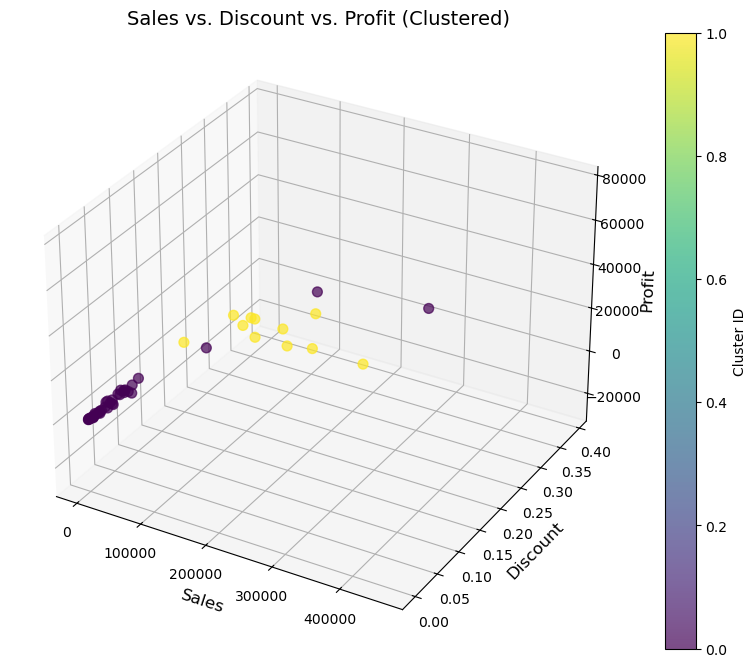

In [858]:
# Create a 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    N_vs_group['Sales'],
    N_vs_group['Discount'],
    N_vs_group['Profit'],
    c=N_vs_group['Cluster_Id'],  # Color by Cluster ID
    cmap='viridis',  # Color palette
    s=50,  # Point size
    alpha=0.7  # Transparency
)

# Add title and axis labels
ax.set_title('Sales vs. Discount vs. Profit (Clustered)', fontsize=14)
ax.set_xlabel('Sales', fontsize=12)
ax.set_ylabel('Discount', fontsize=12)
ax.set_zlabel('Profit', fontsize=12)

# Add color bar for clusters
plt.colorbar(scatter, ax=ax, label='Cluster ID')

# Show grid
ax.grid(True)

plt.show()
